In [1]:
import seaborn as sns
import matplotlib as mpl
import polars as pl
tips = sns.load_dataset("tips")
penguins = sns.load_dataset("penguins").drop_nulls()
diamonds = sns.load_dataset("diamonds")
healthexp = sns.load_dataset("healthexp").sort(["Country", "Year"], descending=True).filter(pl.col("Year") <= 2020)

In [2]:
import seaborn.objects as so

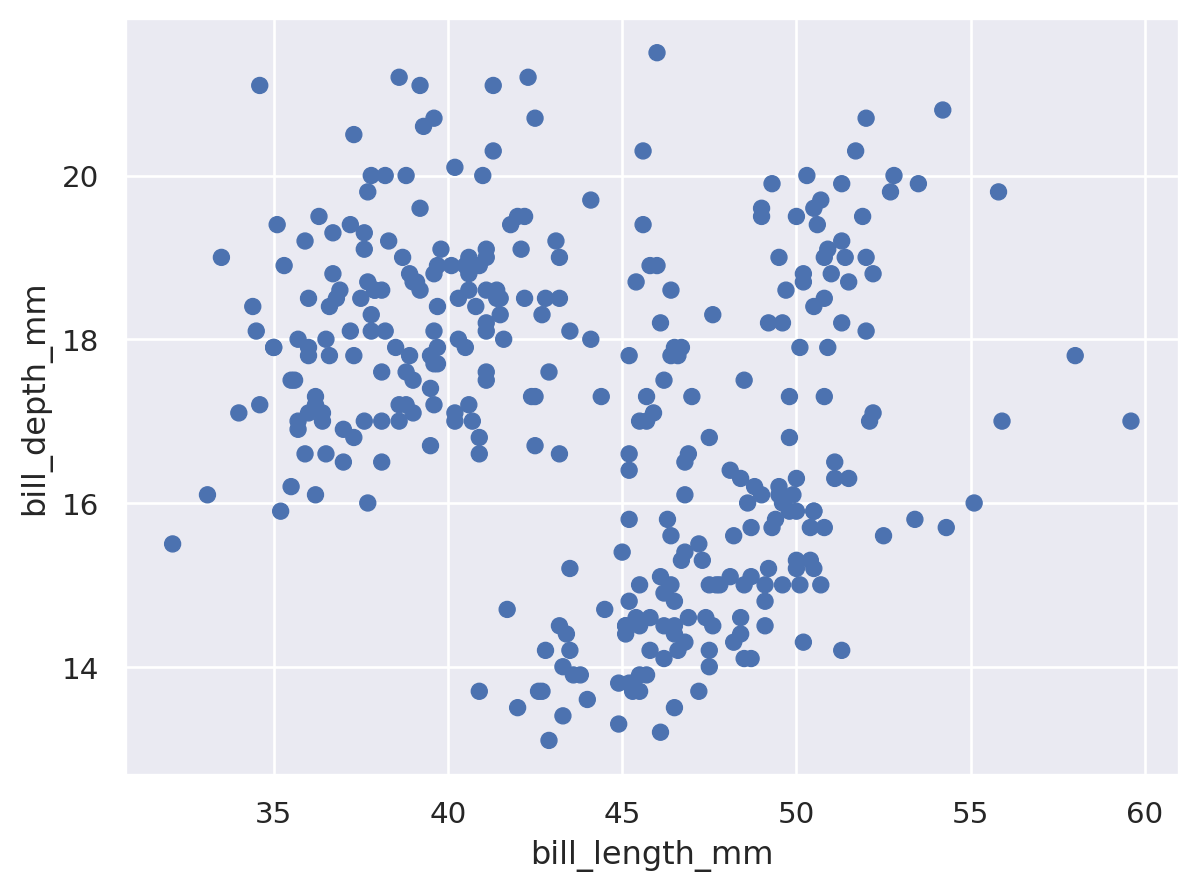

In [3]:
(
    so.Plot(data=penguins, x="bill_length_mm", y="bill_depth_mm")
    .add(so.Dot())
)

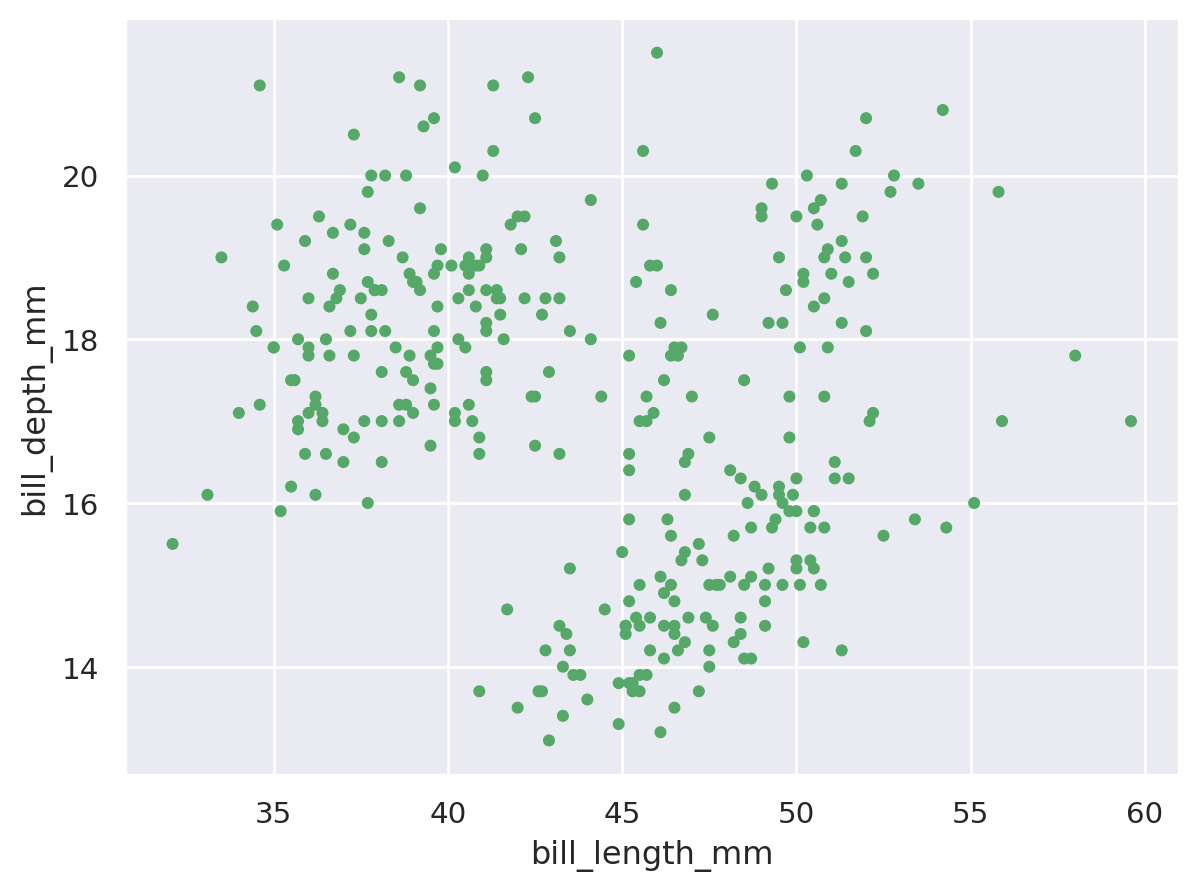

In [4]:
(
    so.Plot(data=penguins, x="bill_length_mm", y="bill_depth_mm")
    .add(so.Dot(color="g", pointsize=4))
)

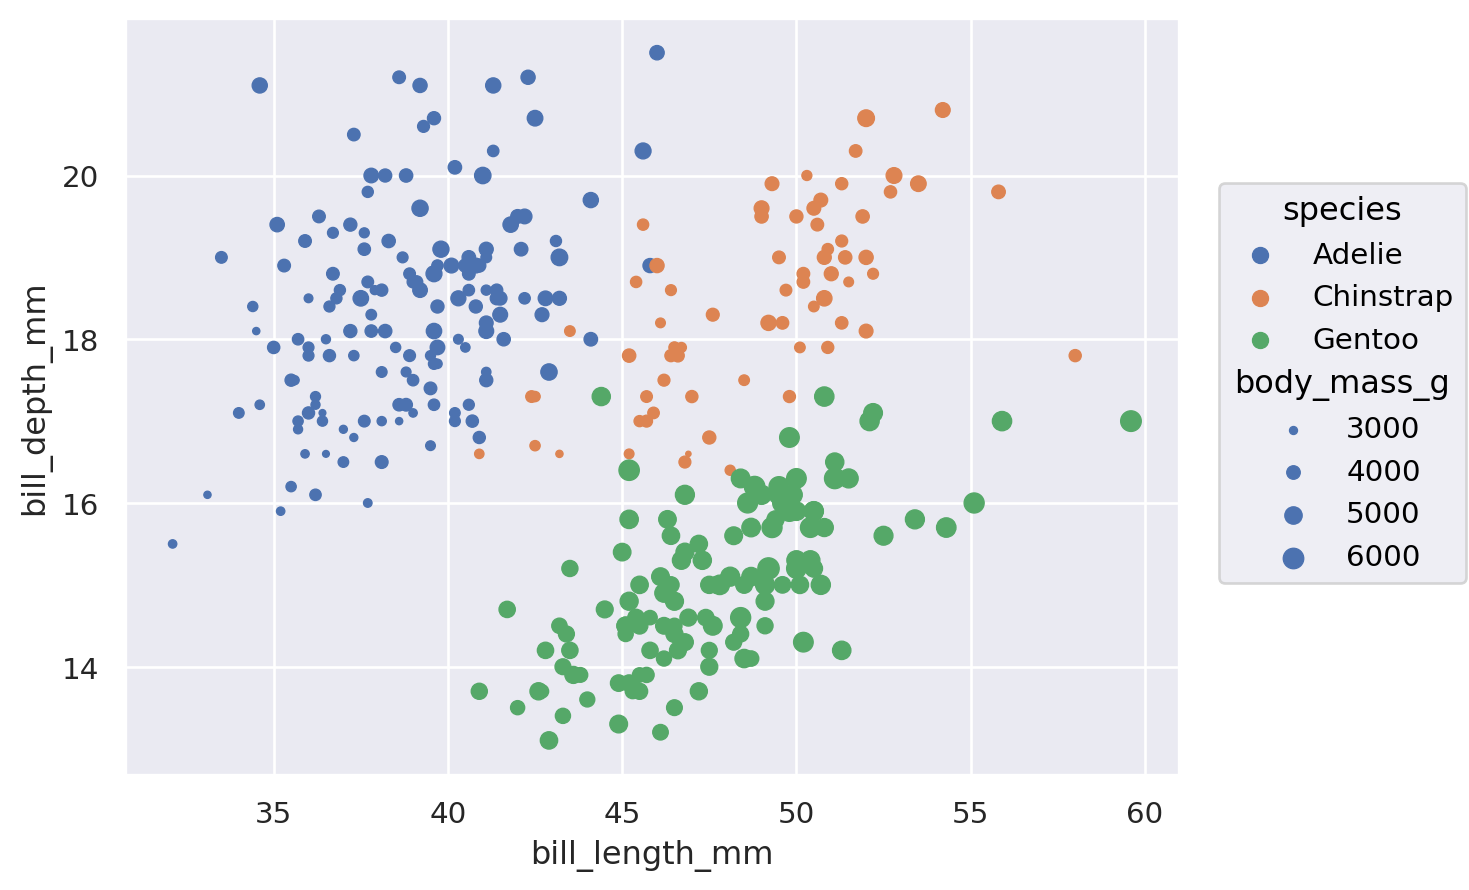

In [5]:
(
    so.Plot(
        data=penguins, x="bill_length_mm", y="bill_depth_mm",
        color="species", pointsize="body_mass_g",
    )
    .add(so.Dot())
)

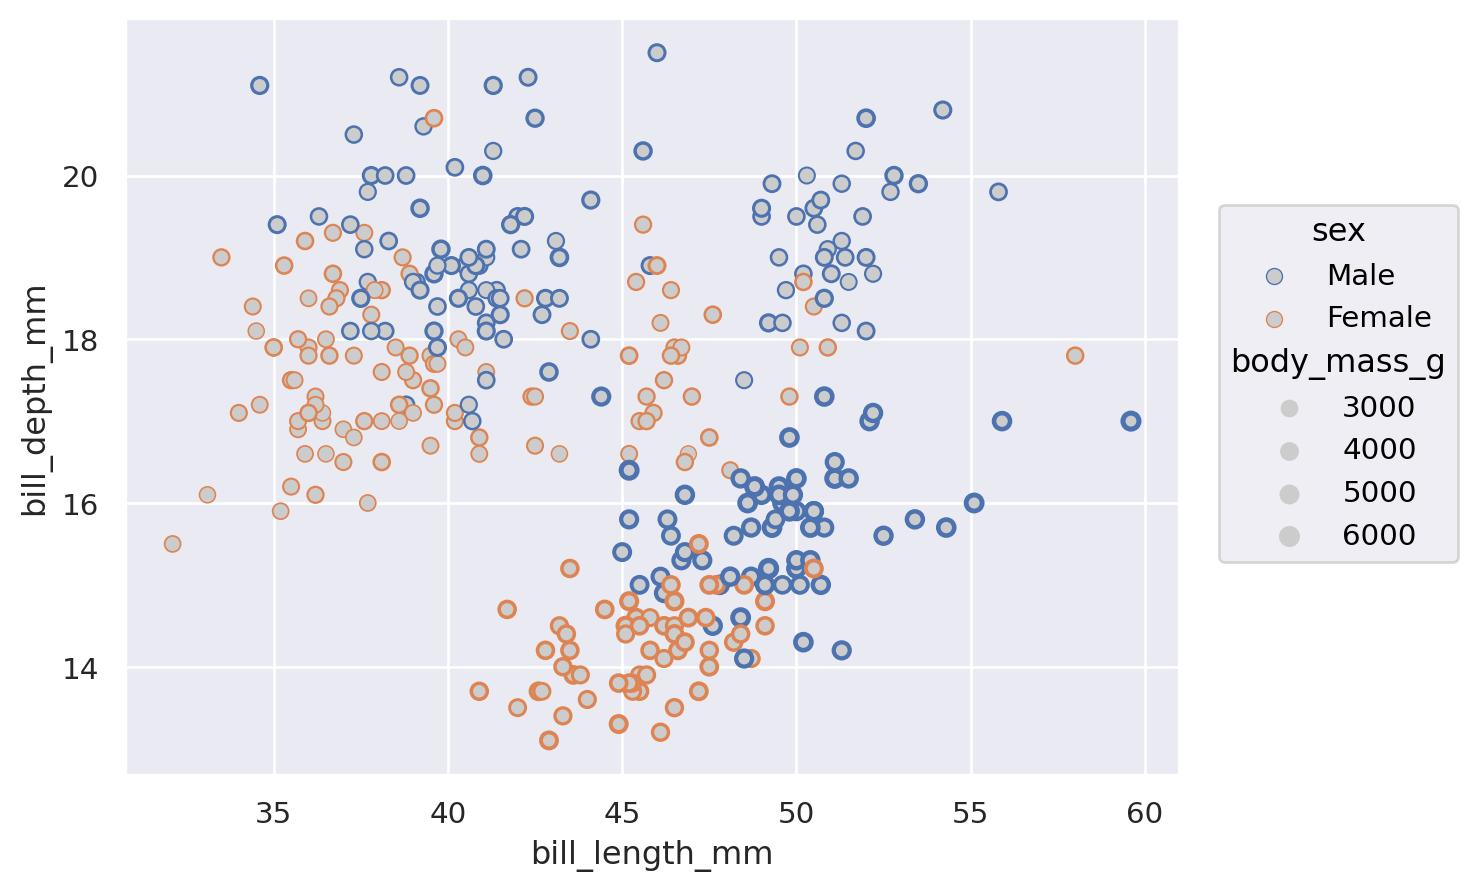

In [6]:
(
    so.Plot(
        data=penguins, x="bill_length_mm", y="bill_depth_mm",
        edgecolor="sex", edgewidth="body_mass_g",
    )
    .add(so.Dot(color=".8"))
)

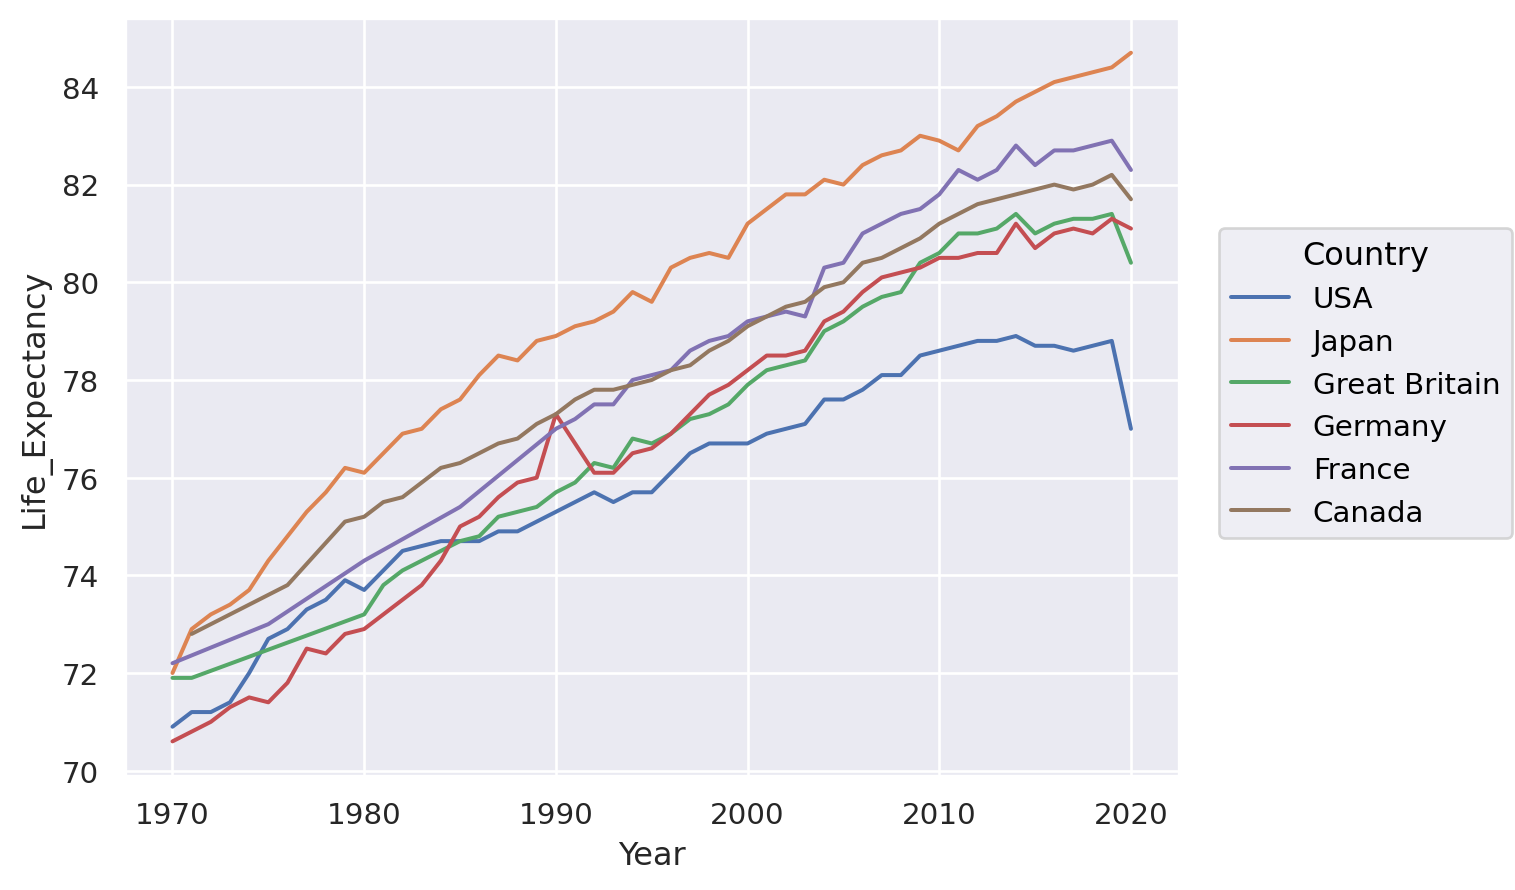

In [7]:
(
    so.Plot(data=healthexp, x="Year", y="Life_Expectancy", color="Country")
    .add(so.Line())
)

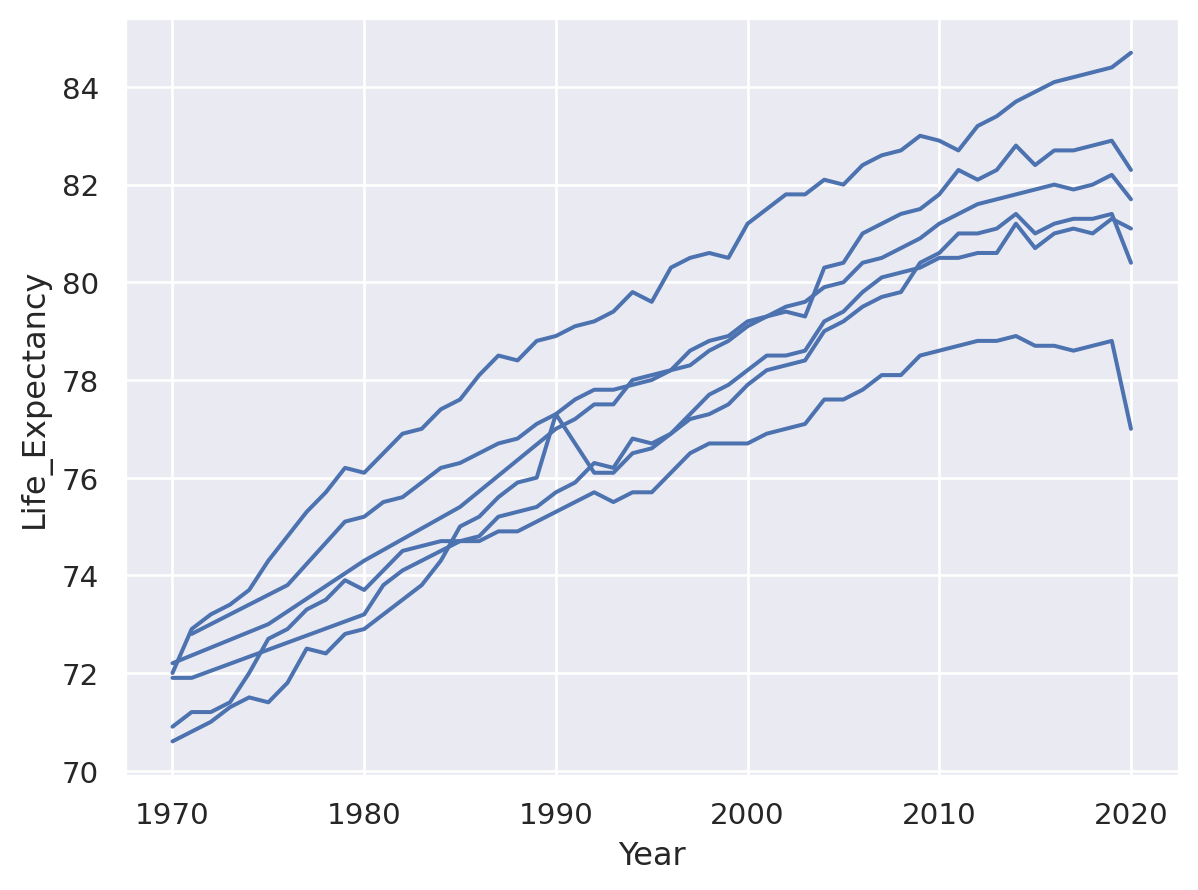

In [8]:
(
    so.Plot(data=healthexp, x="Year", y="Life_Expectancy", group="Country")
    .add(so.Line())
)

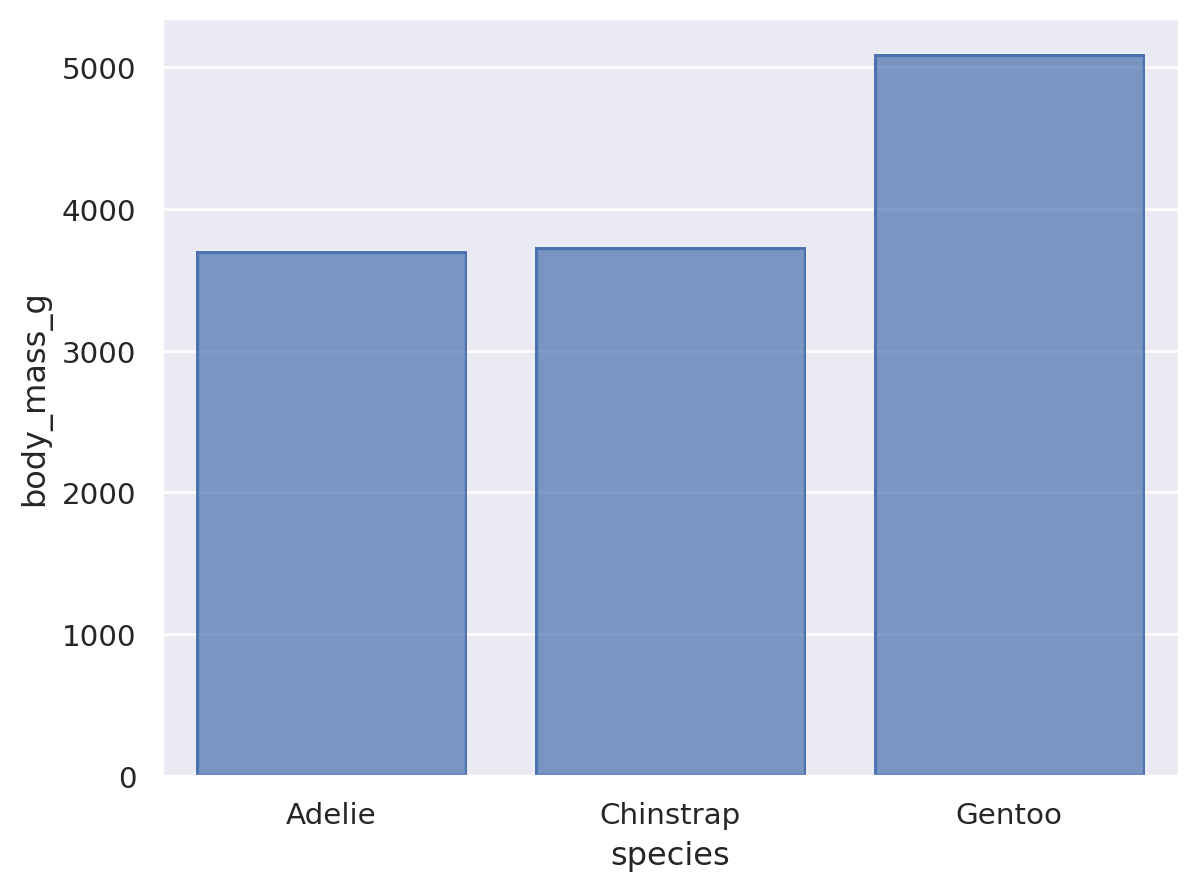

In [9]:
(
    so.Plot(data=penguins, x="species", y="body_mass_g")
    .add(so.Bar(), so.Agg())
)

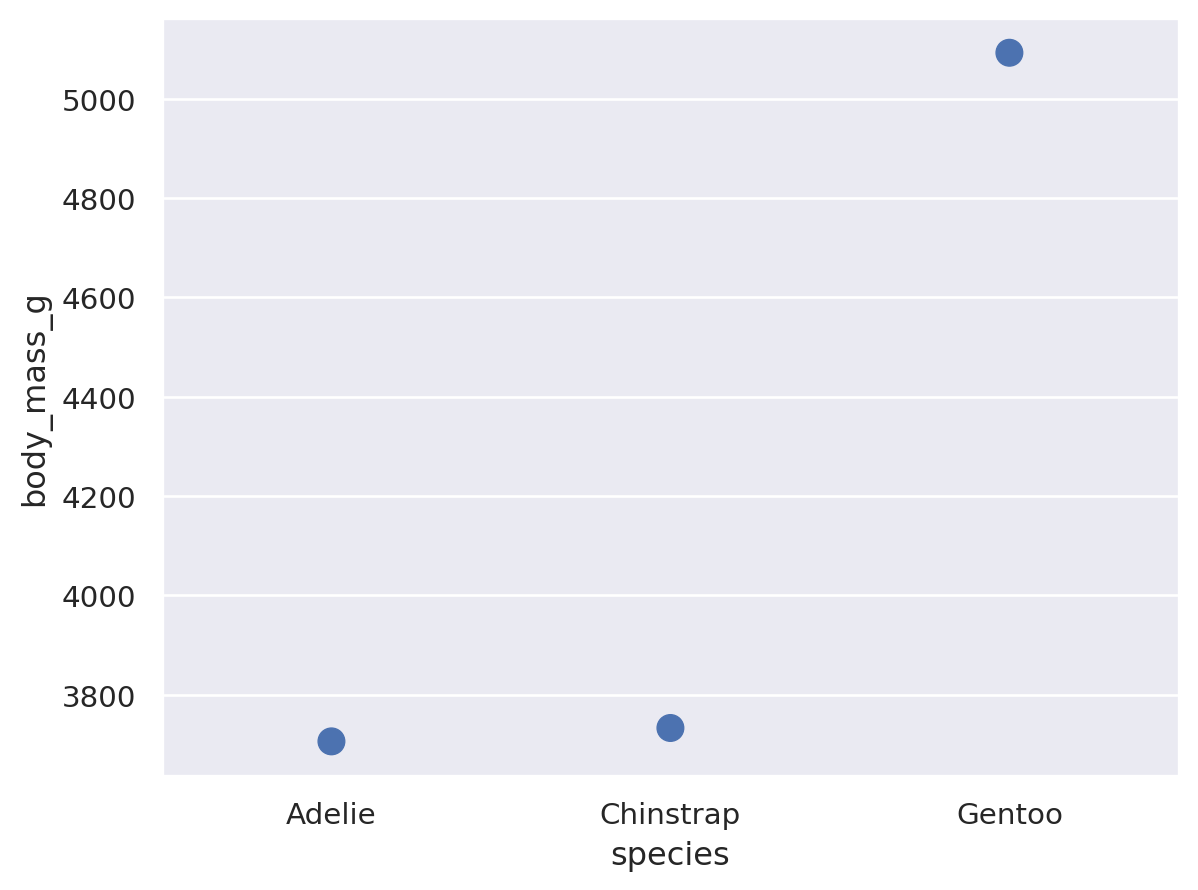

In [10]:
(
    so.Plot(data=penguins, x="species", y="body_mass_g")
    .add(so.Dot(pointsize=10), so.Agg())
)

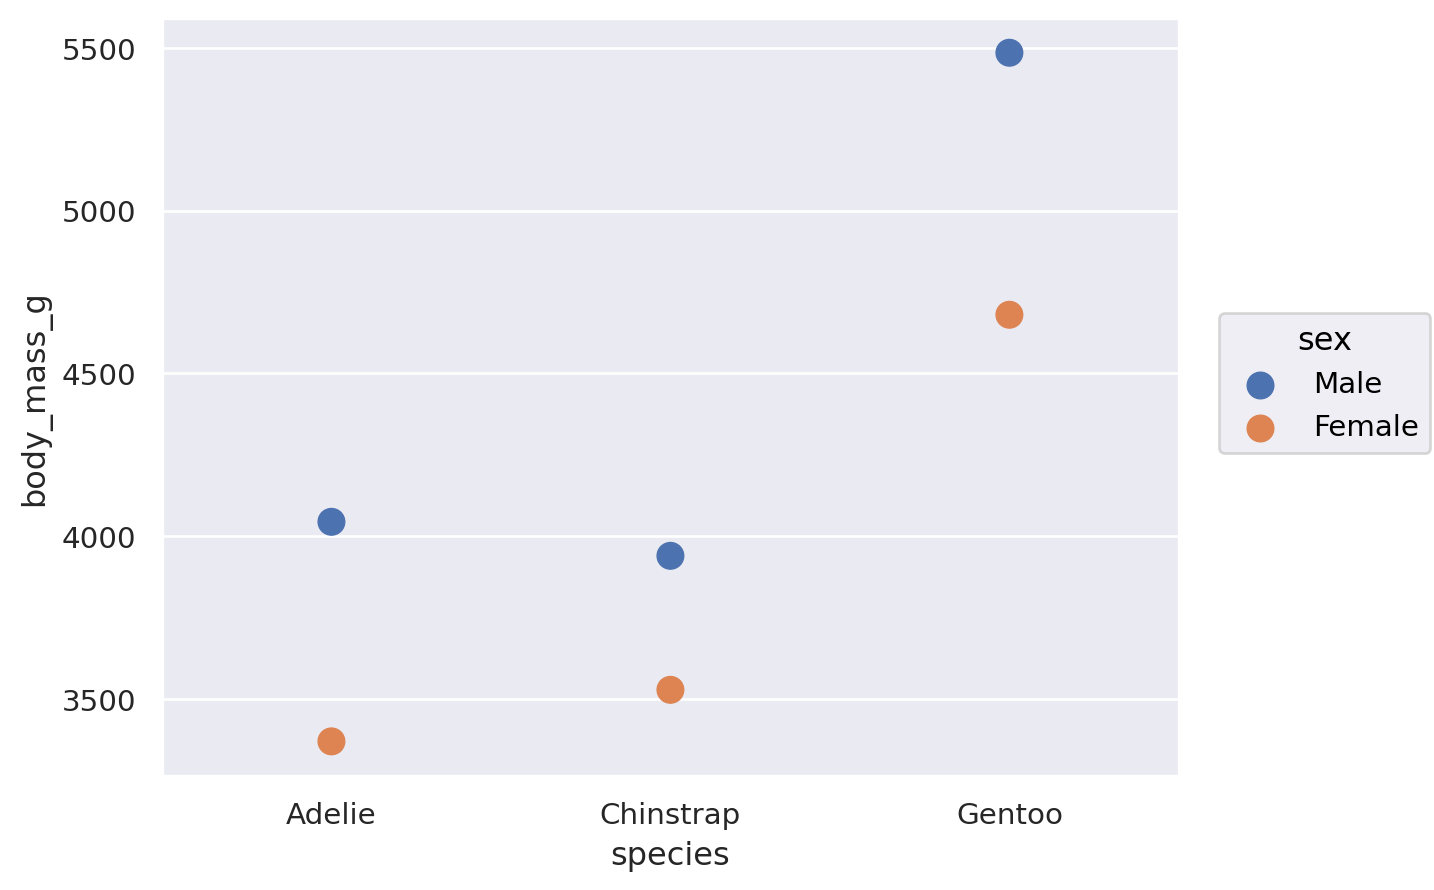

In [11]:
(
    so.Plot(data=penguins, x="species", y="body_mass_g", color="sex")
    .add(so.Dot(pointsize=10), so.Agg())
)

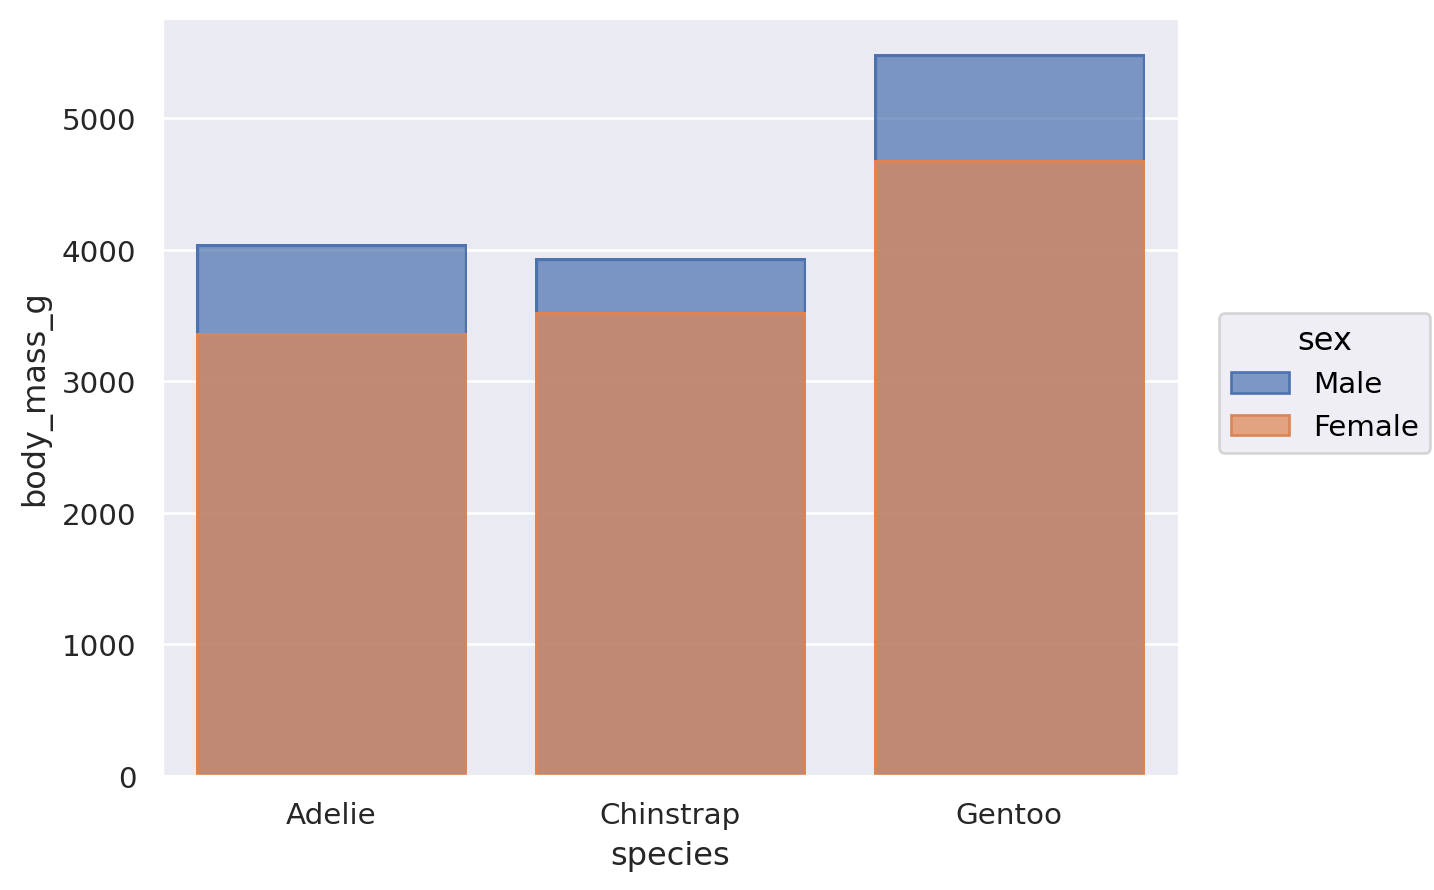

In [12]:
(
    so.Plot(data=penguins, x="species", y="body_mass_g", color="sex")
    .add(so.Bar(), so.Agg())
)

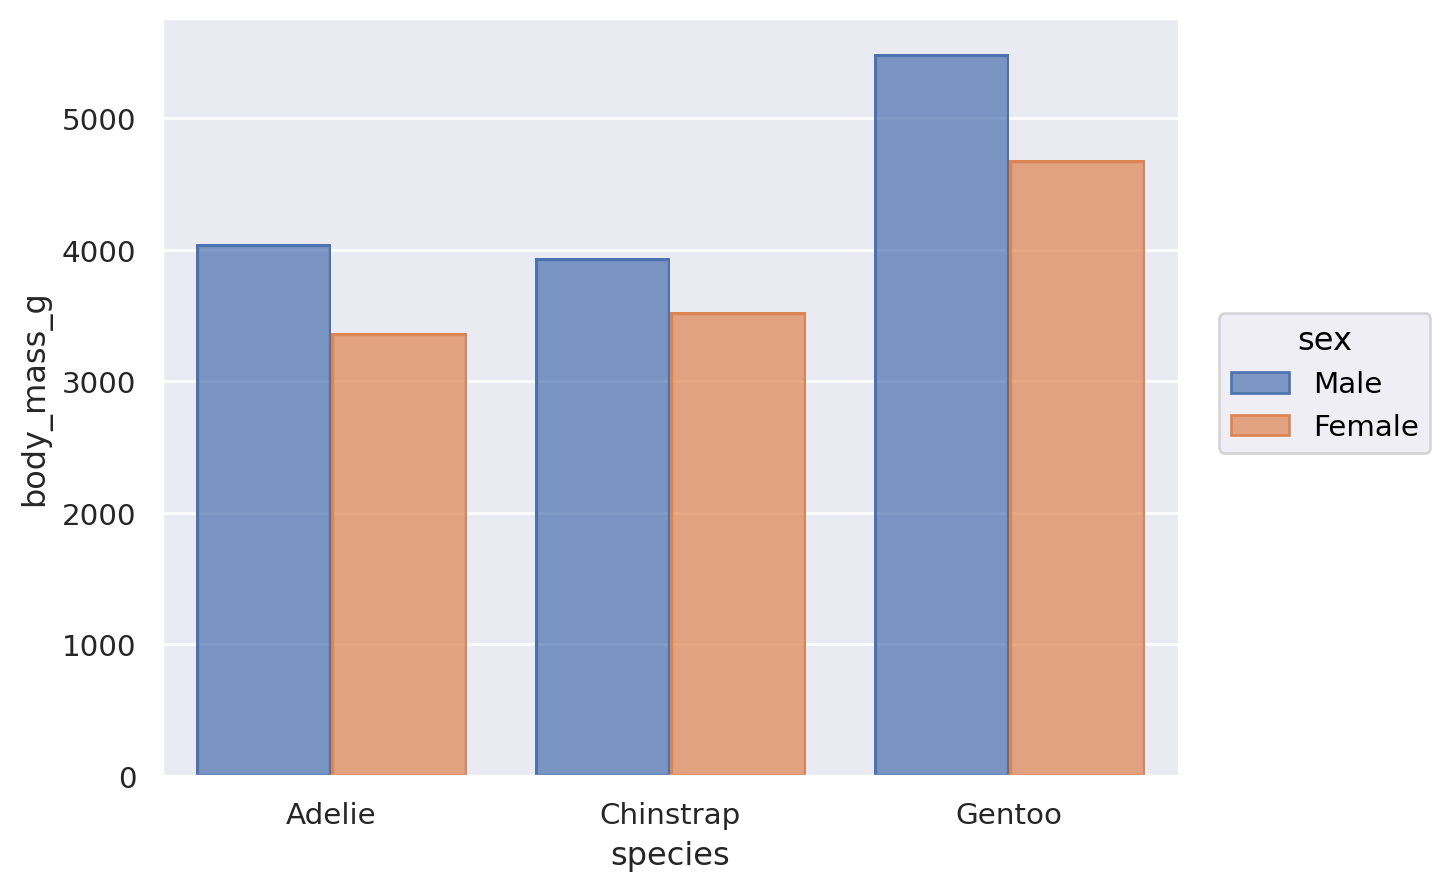

In [13]:
(
    so.Plot(data=penguins, x="species", y="body_mass_g", color="sex")
    .add(so.Bar(), so.Agg(), so.Dodge())
)

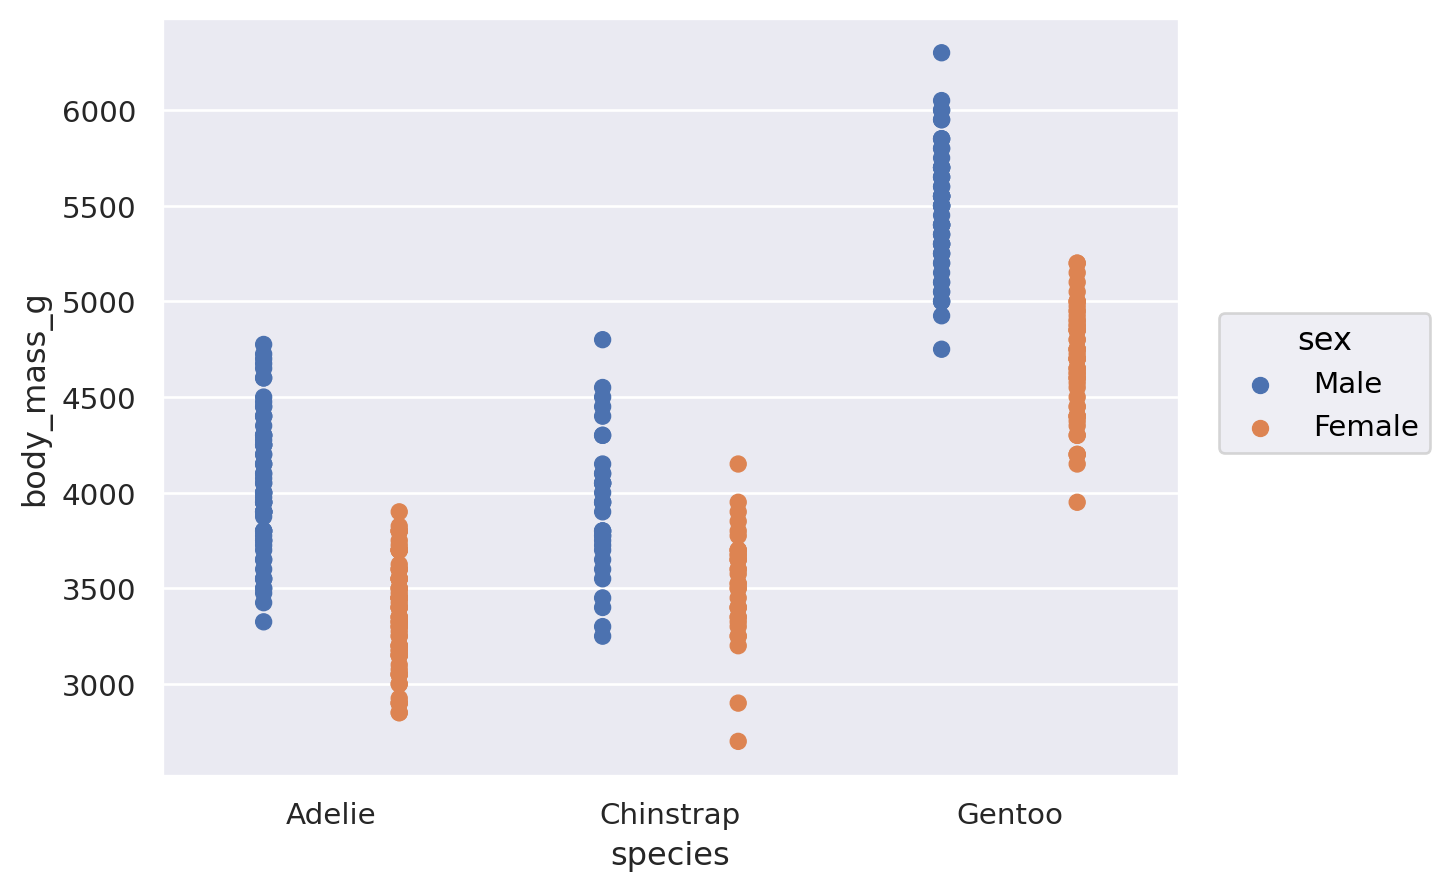

In [14]:
(
    so.Plot(data=penguins, x="species", y="body_mass_g", color="sex")
    .add(so.Dot(), so.Dodge())
)

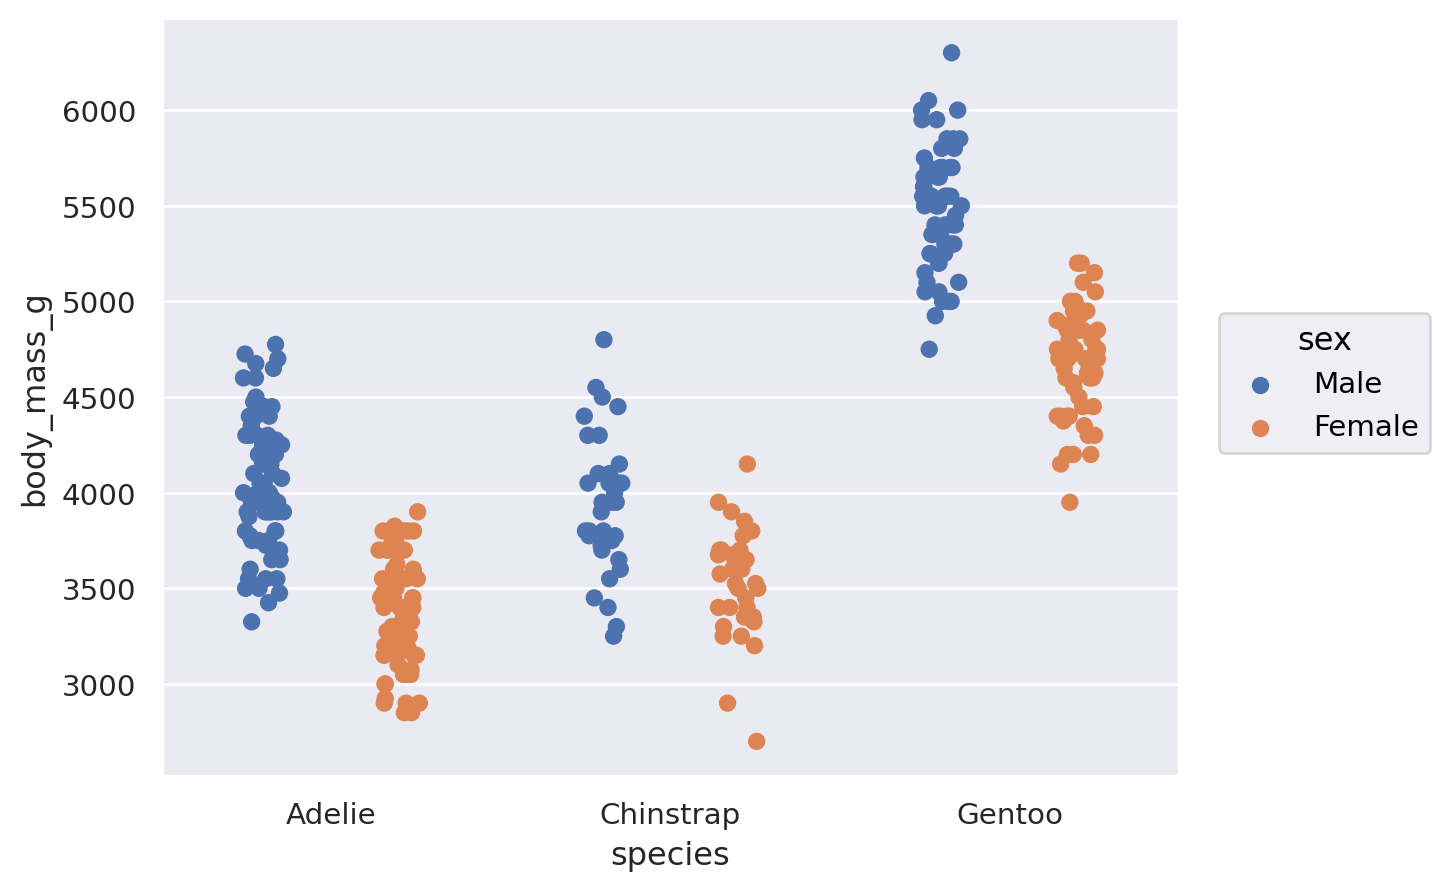

In [15]:
(
    so.Plot(data=penguins, x="species", y="body_mass_g", color="sex")
    .add(so.Dot(), so.Dodge(), so.Jitter(.3))
)

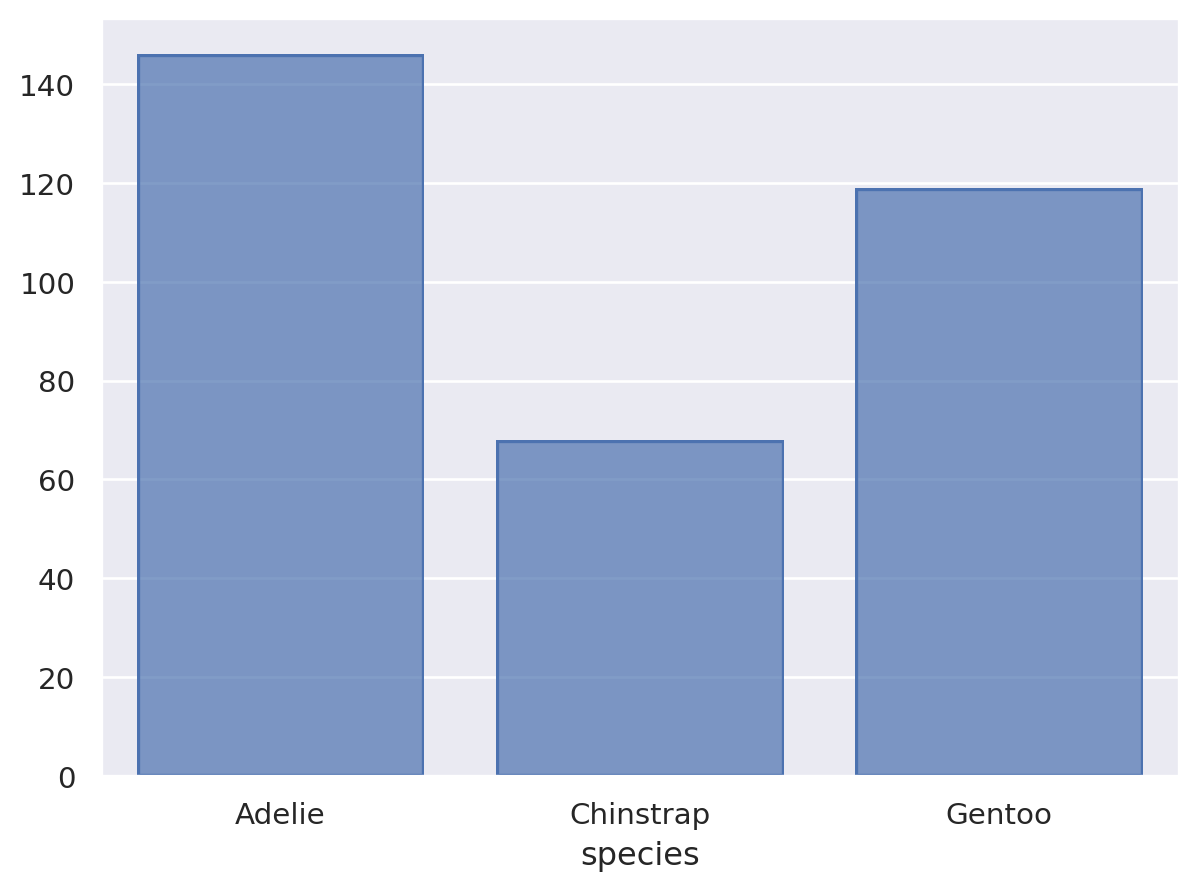

In [16]:
(
    so.Plot(data=penguins, x="species")
    .add(so.Bar(), so.Hist())
)

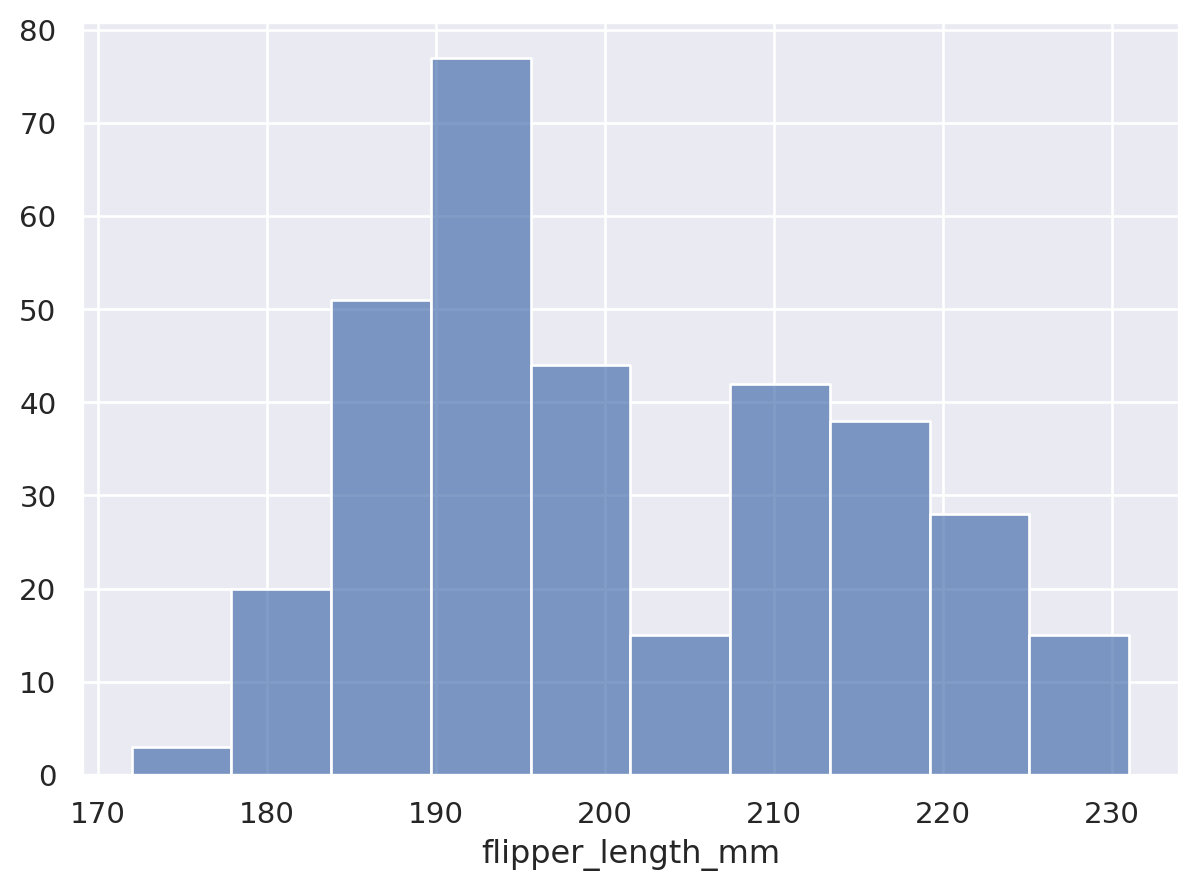

In [17]:
(
    so.Plot(data=penguins, x="flipper_length_mm")
    .add(so.Bars(), so.Hist())
)

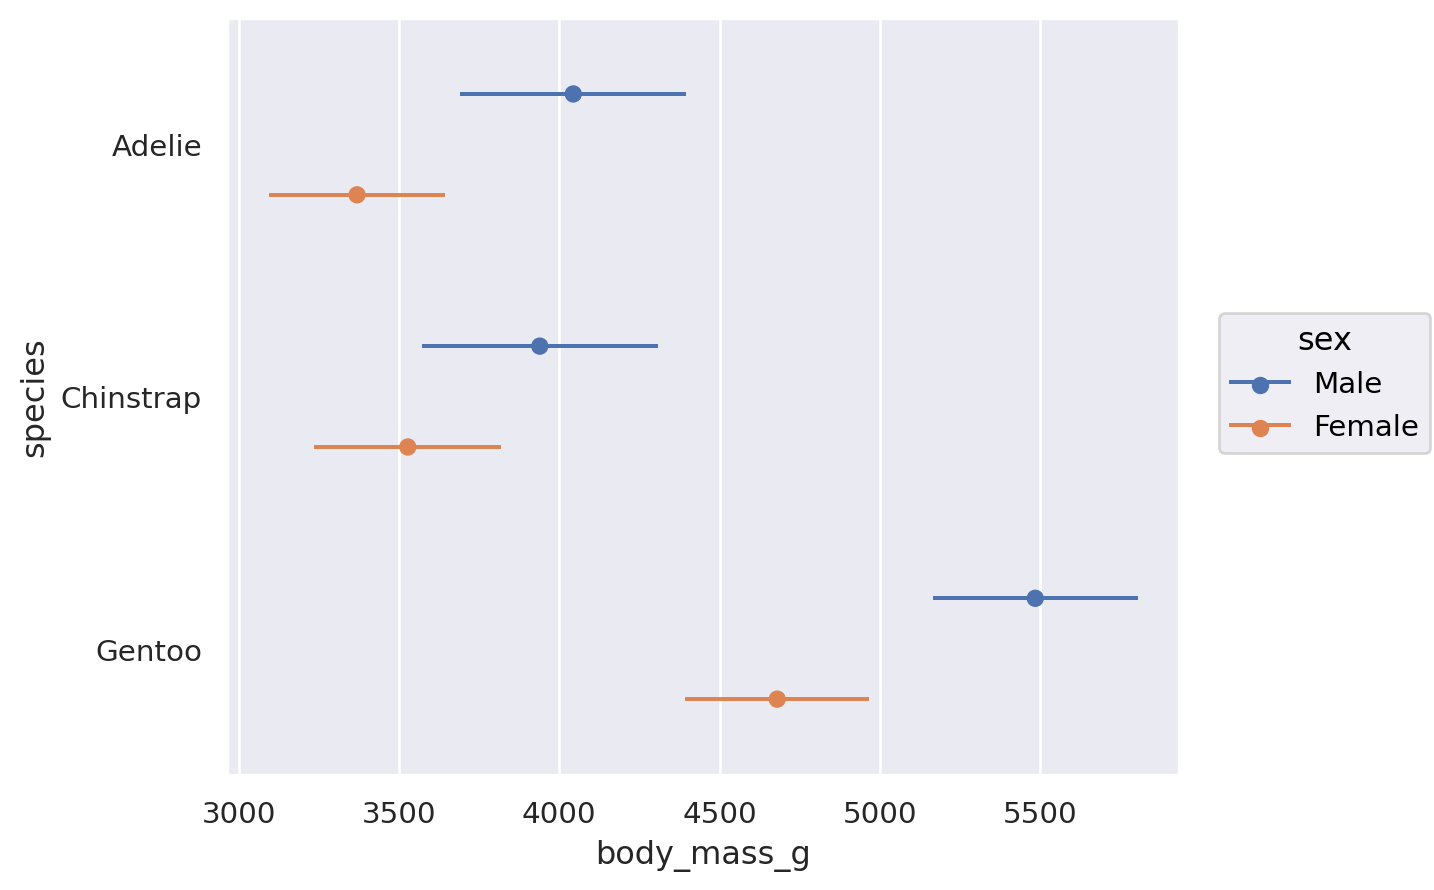

In [18]:
(
    so.Plot(data=penguins, x="body_mass_g", y="species", color="sex")
    .add(so.Range(), so.Est(errorbar="sd"), so.Dodge())
    .add(so.Dot(), so.Agg(), so.Dodge())
)

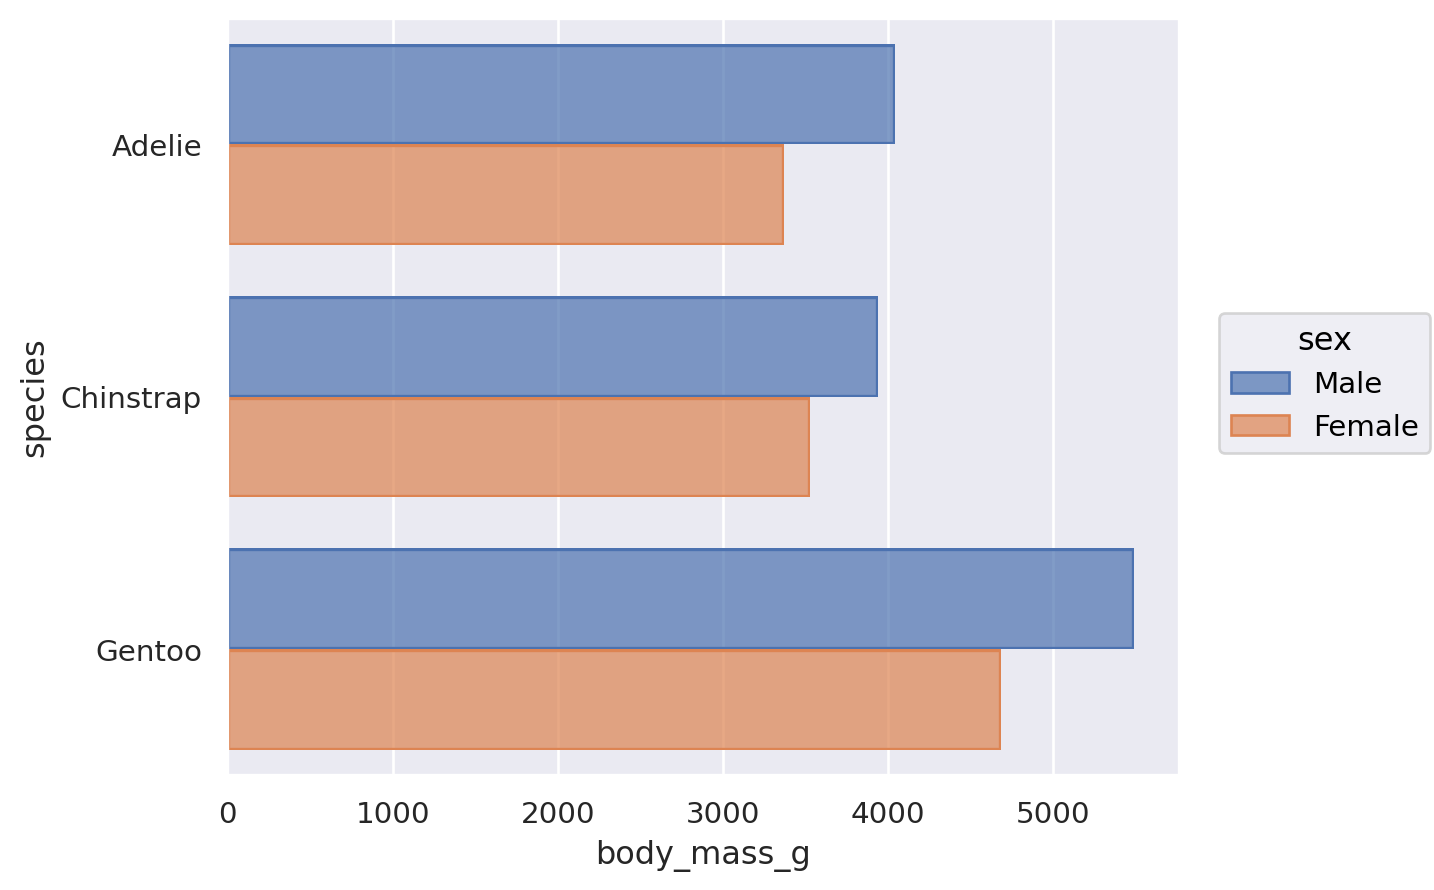

In [19]:
(
    so.Plot(data=penguins, x="body_mass_g", y="species", color="sex")
    .add(so.Bar(), so.Agg(), so.Dodge())
)

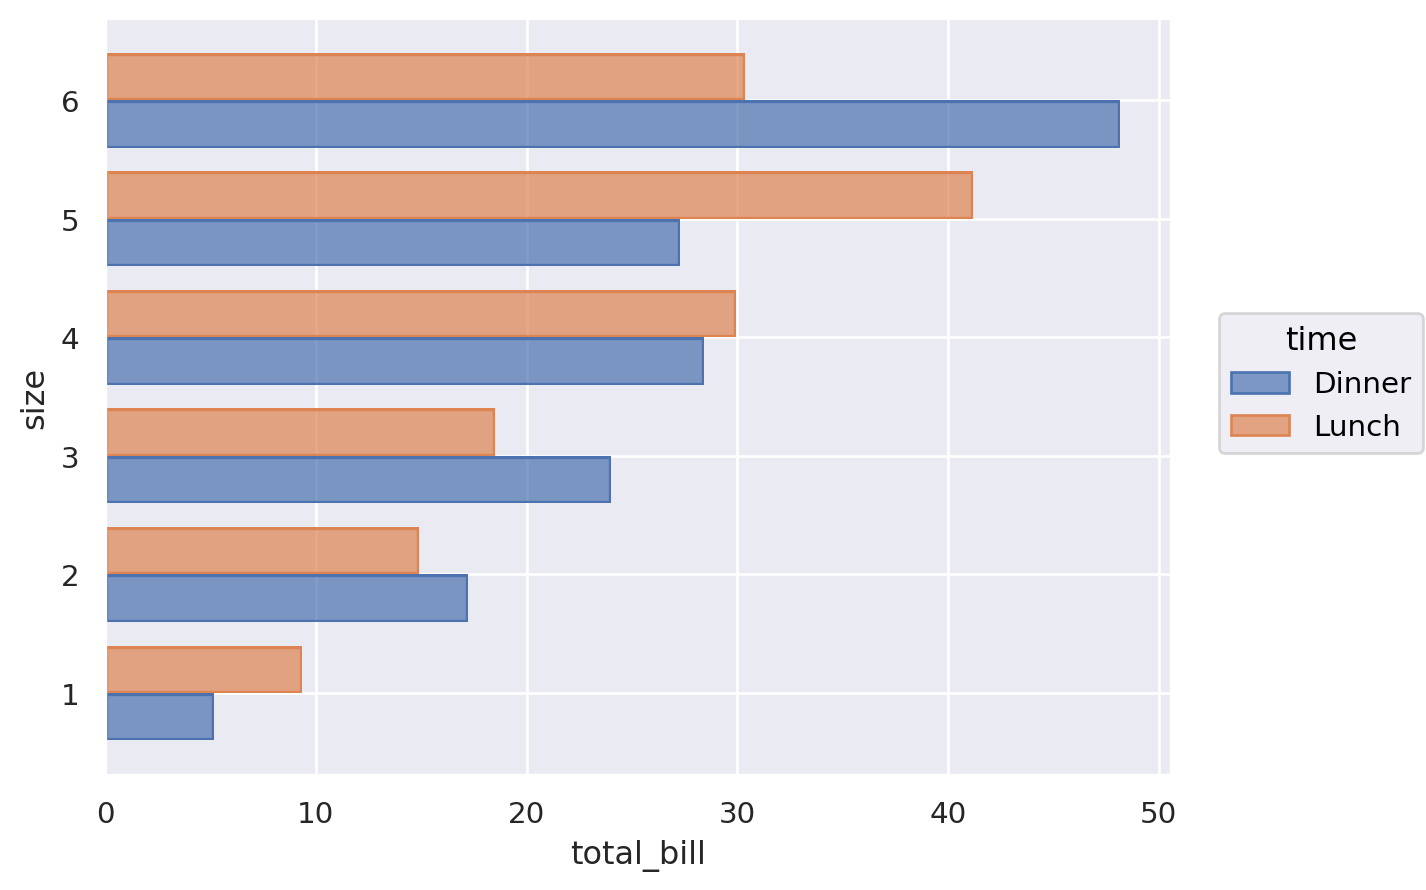

In [20]:
(
    so.Plot(data=tips, x="total_bill", y="size", color="time")
    .add(so.Bar(), so.Agg(), so.Dodge(), orient="y")
)

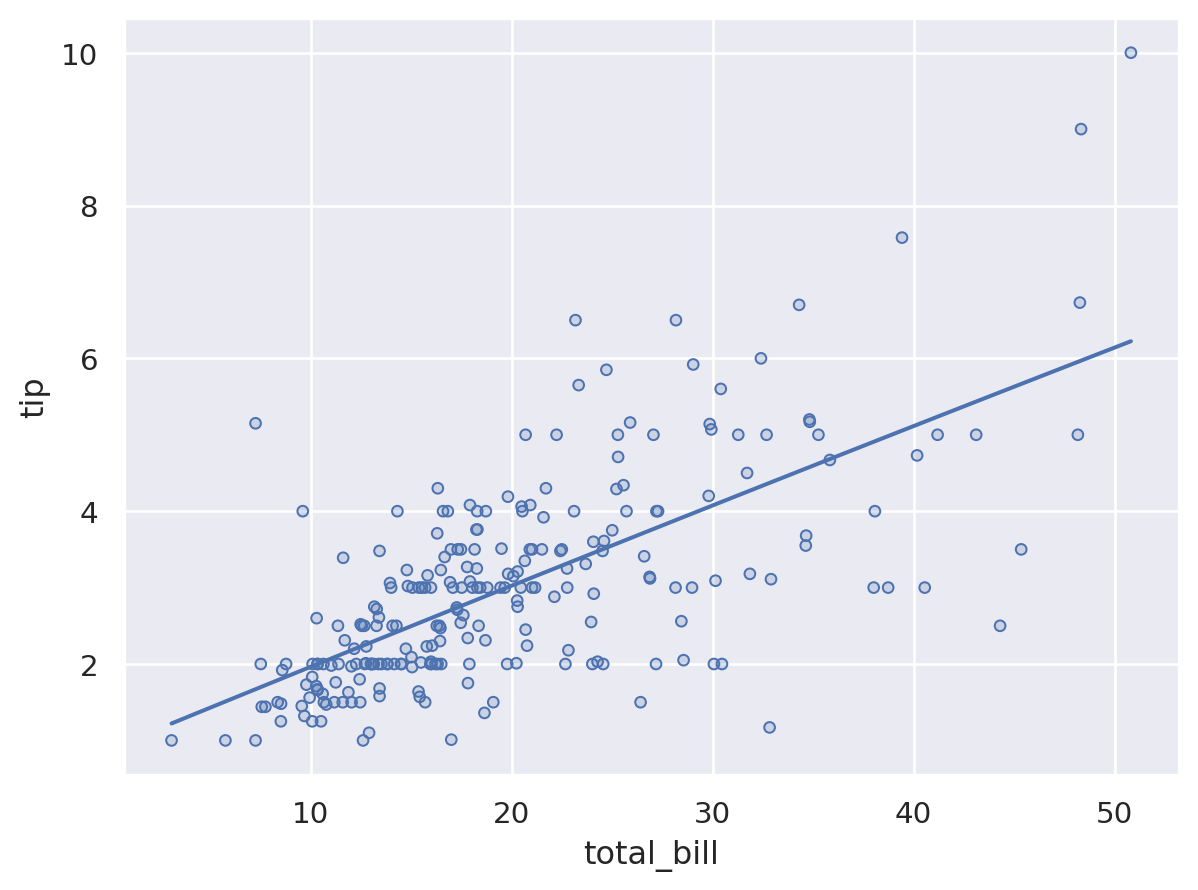

In [21]:
(
    so.Plot(data=tips, x="total_bill", y="tip")
    .add(so.Dots())
    .add(so.Line(), so.PolyFit())
)

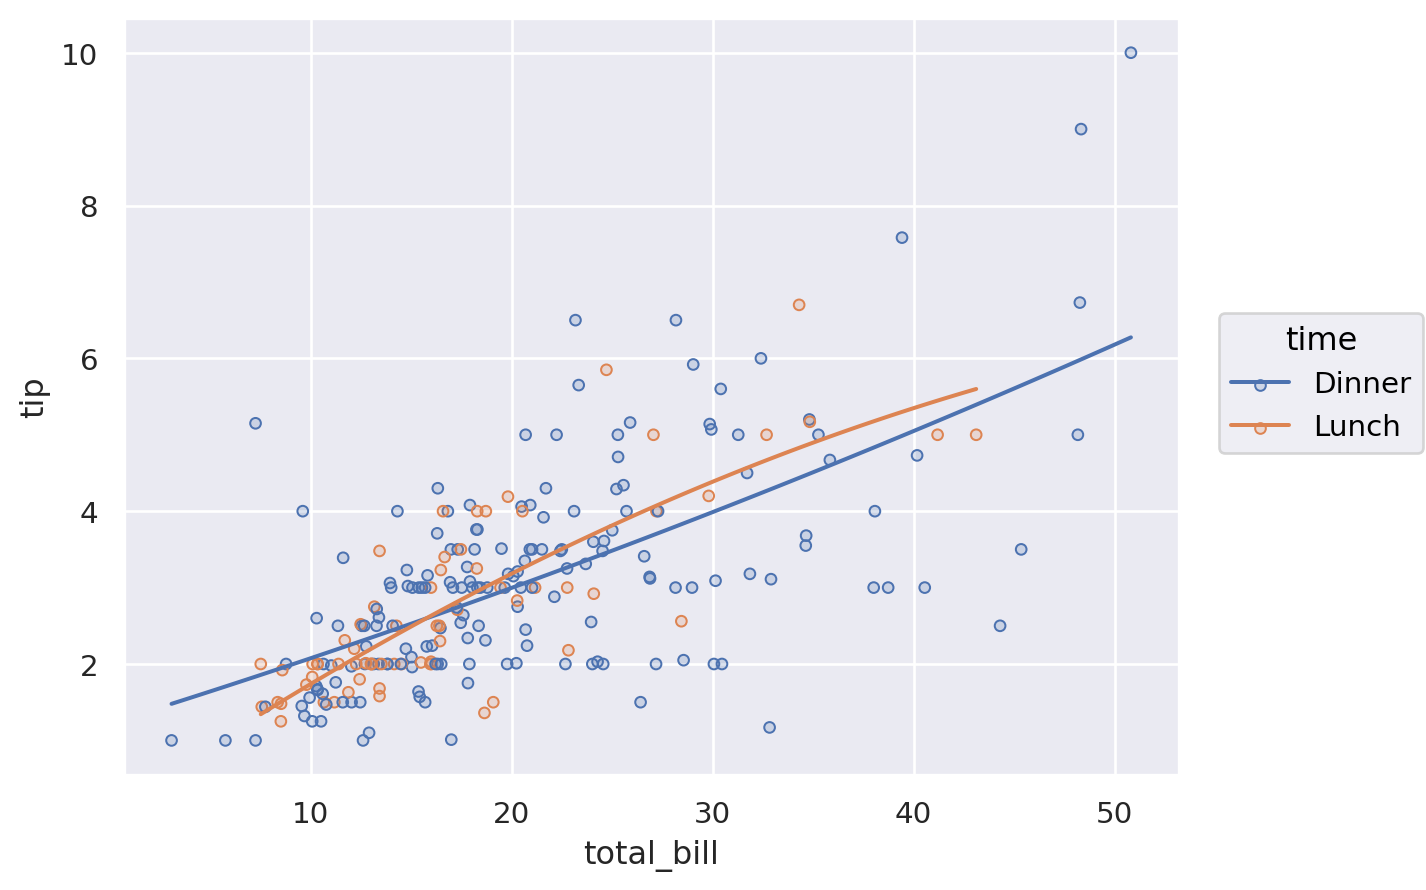

In [22]:
(
    so.Plot(data=tips, x="total_bill", y="tip", color="time")
    .add(so.Dots())
    .add(so.Line(), so.PolyFit())
)

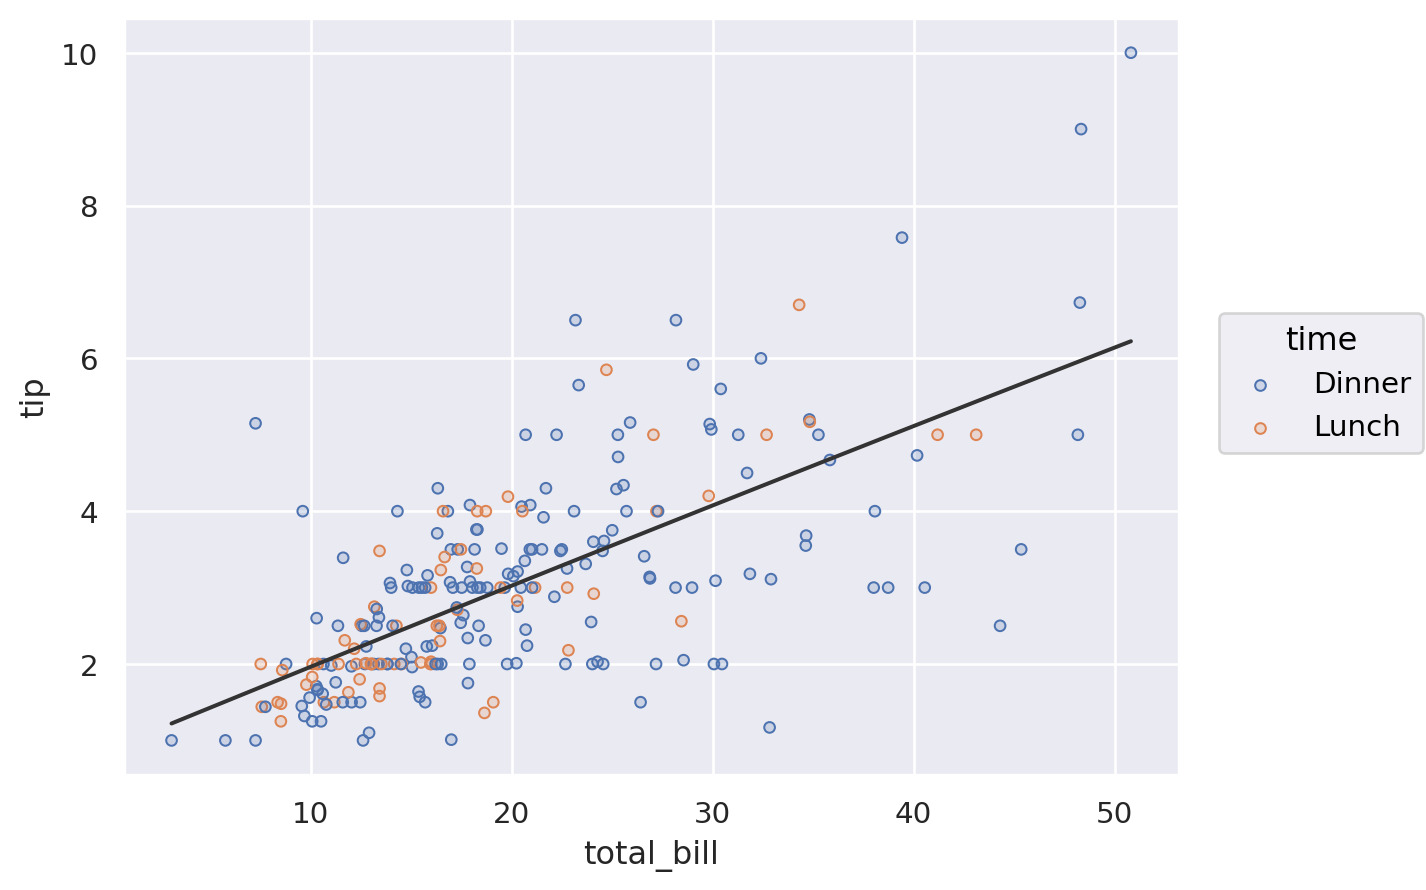

In [23]:
(
    so.Plot(data=tips, x="total_bill", y="tip")
    .add(so.Dots(), color="time")
    .add(so.Line(color=".2"), so.PolyFit())
)

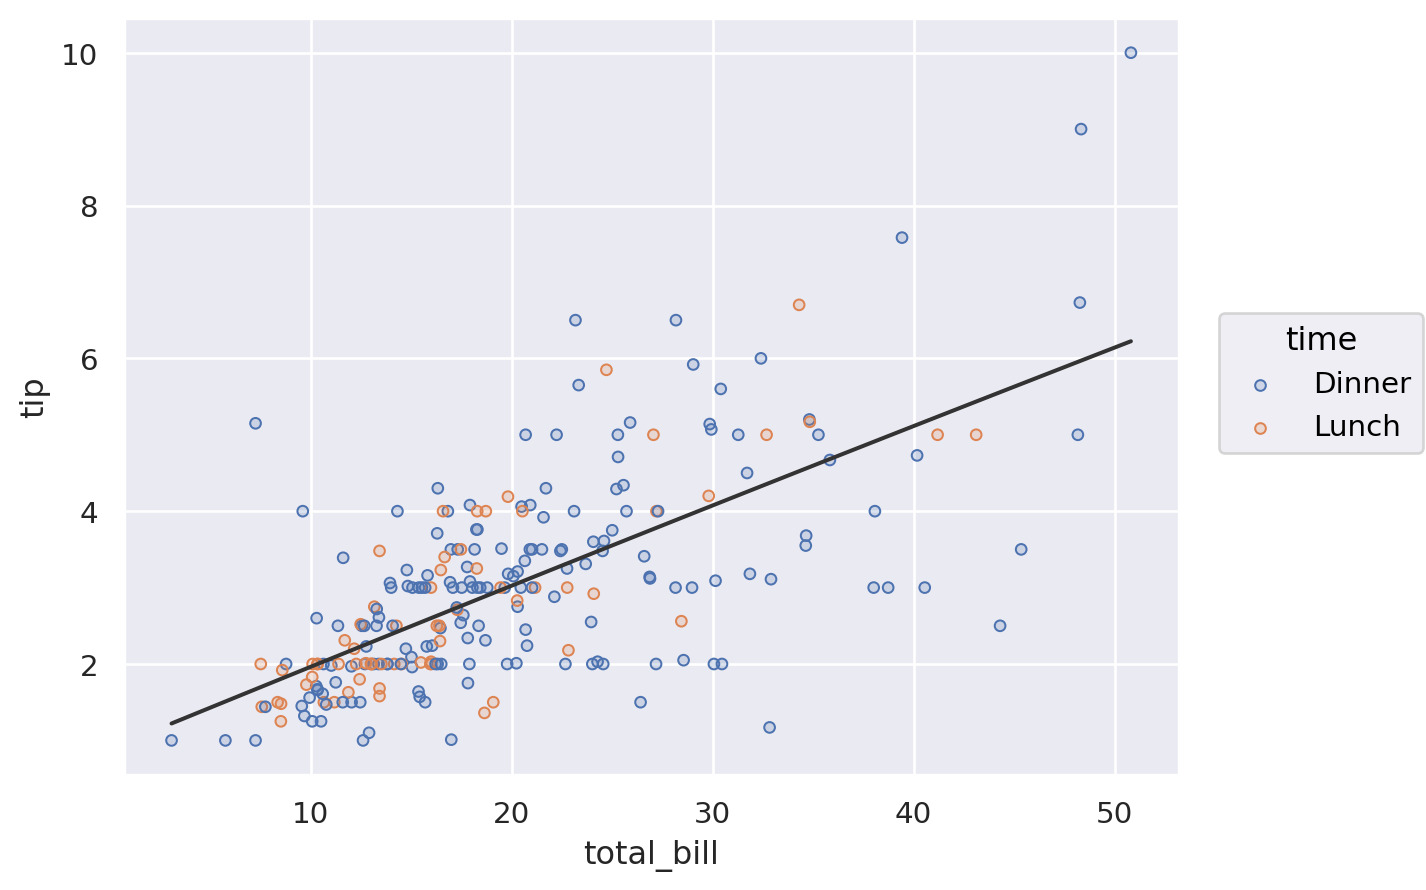

In [24]:
(
    so.Plot(data=tips, x="total_bill", y="tip", color="time")
    .add(so.Dots())
    .add(so.Line(color=".2"), so.PolyFit(), color=None)
)

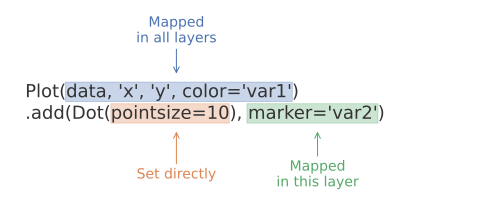

In [25]:
from io import StringIO
from IPython.display import SVG
C = sns.color_palette("deep")
f = mpl.figure.Figure(figsize=(7, 3))
ax = f.subplots()
fontsize = 18
ax.add_artist(mpl.patches.Rectangle((.13, .53), .45, .09, color=C[0], alpha=.3))
ax.add_artist(mpl.patches.Rectangle((.22, .43), .235, .09, color=C[1], alpha=.3))
ax.add_artist(mpl.patches.Rectangle((.49, .43), .26, .09, color=C[2], alpha=.3))
ax.text(.05, .55, "Plot(data, 'x', 'y', color='var1')", size=fontsize, color=".2")
ax.text(.05, .45, ".add(Dot(pointsize=10), marker='var2')", size=fontsize, color=".2")
annots = [
    ("Mapped\nin all layers", (.35, .65), (0, 45)),
    ("Set directly", (.35, .4), (0, -45)),
    ("Mapped\nin this layer", (.63, .4), (0, -45)),
]
for i, (text, xy, xytext) in enumerate(annots):
    ax.annotate(
        text, xy, xytext,
        textcoords="offset points", fontsize=14, ha="center", va="center",
        arrowprops=dict(arrowstyle="->", color=C[i]), color=C[i],
    )
ax.set_axis_off()
f.subplots_adjust(0, 0, 1, 1)
f.savefig(s:=StringIO(), format="svg")
SVG(s.getvalue())

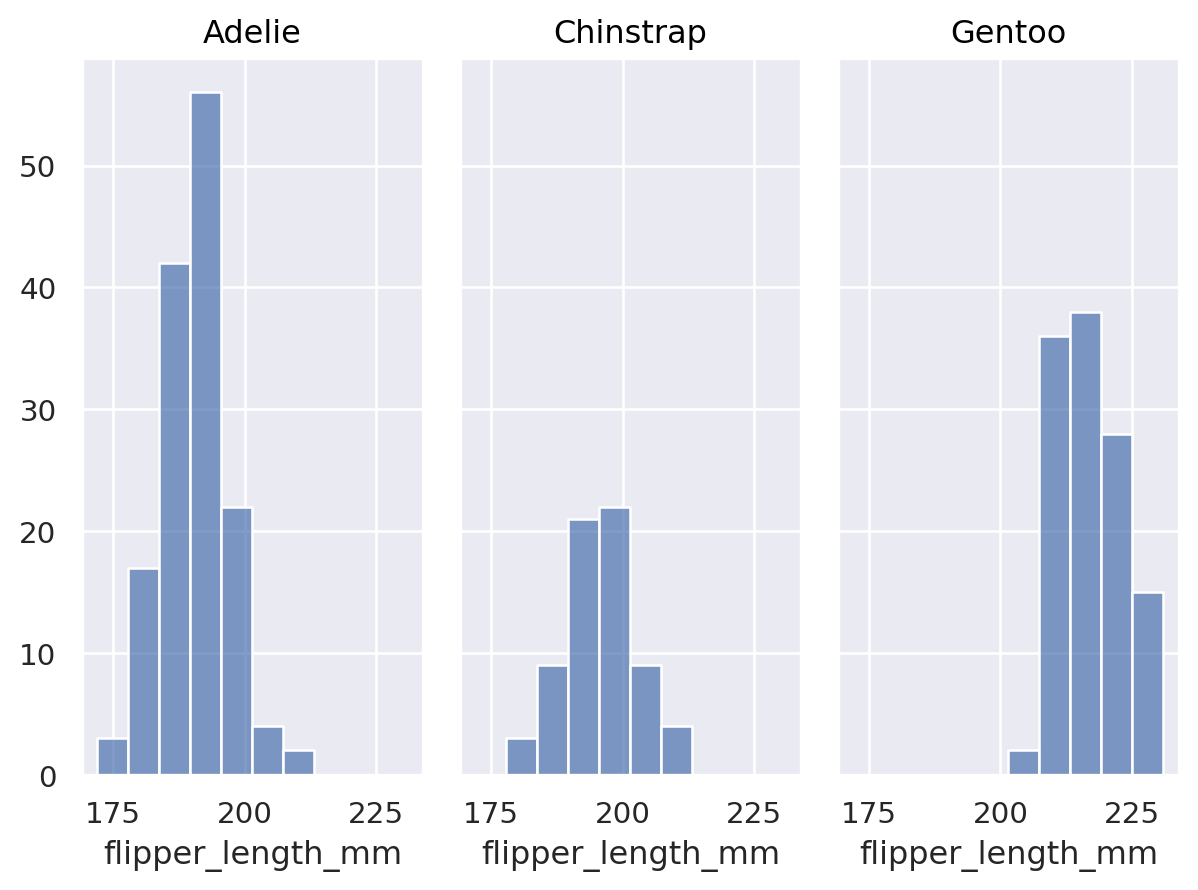

In [26]:
(
    so.Plot(data=penguins, x="flipper_length_mm")
    .facet("species")
    .add(so.Bars(), so.Hist())
)

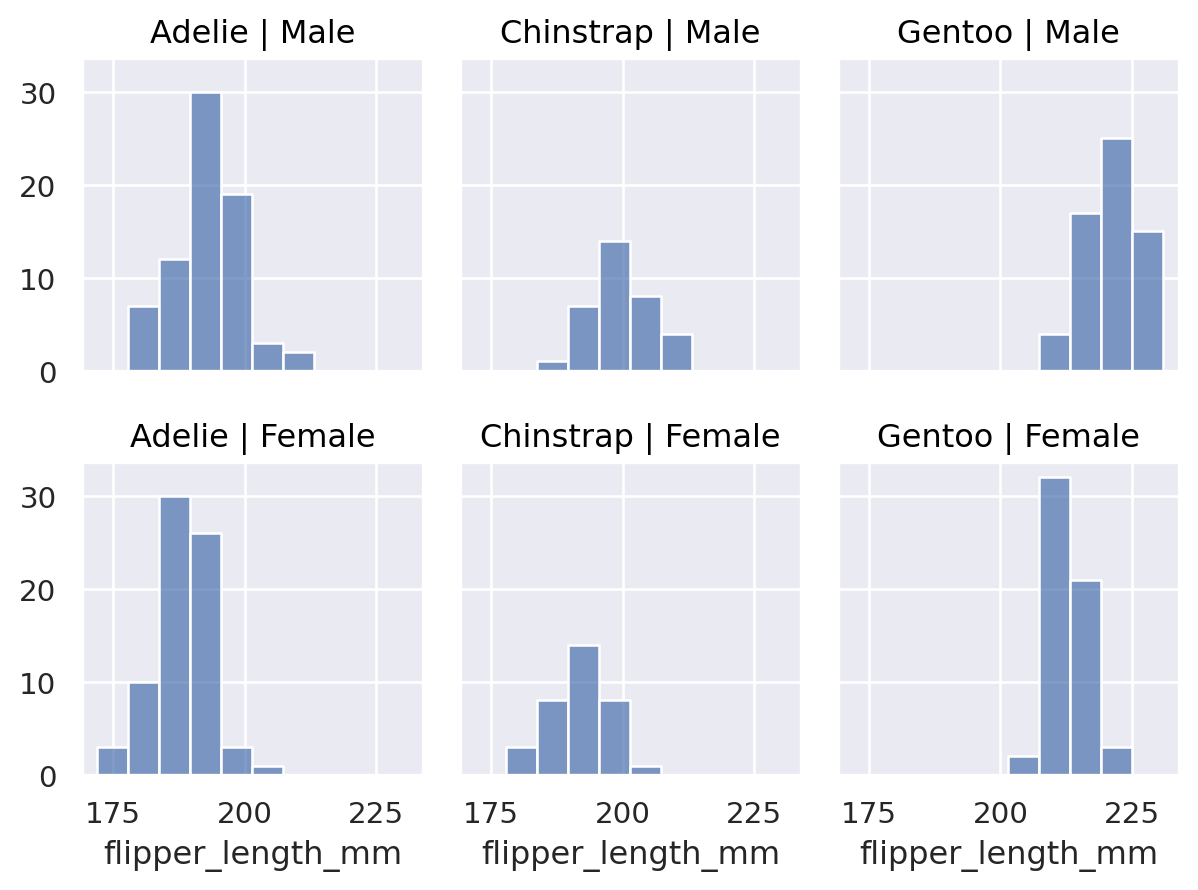

In [27]:
(
    so.Plot(data=penguins, x="flipper_length_mm")
    .facet(col="species", row="sex")
    .add(so.Bars(), so.Hist())
)

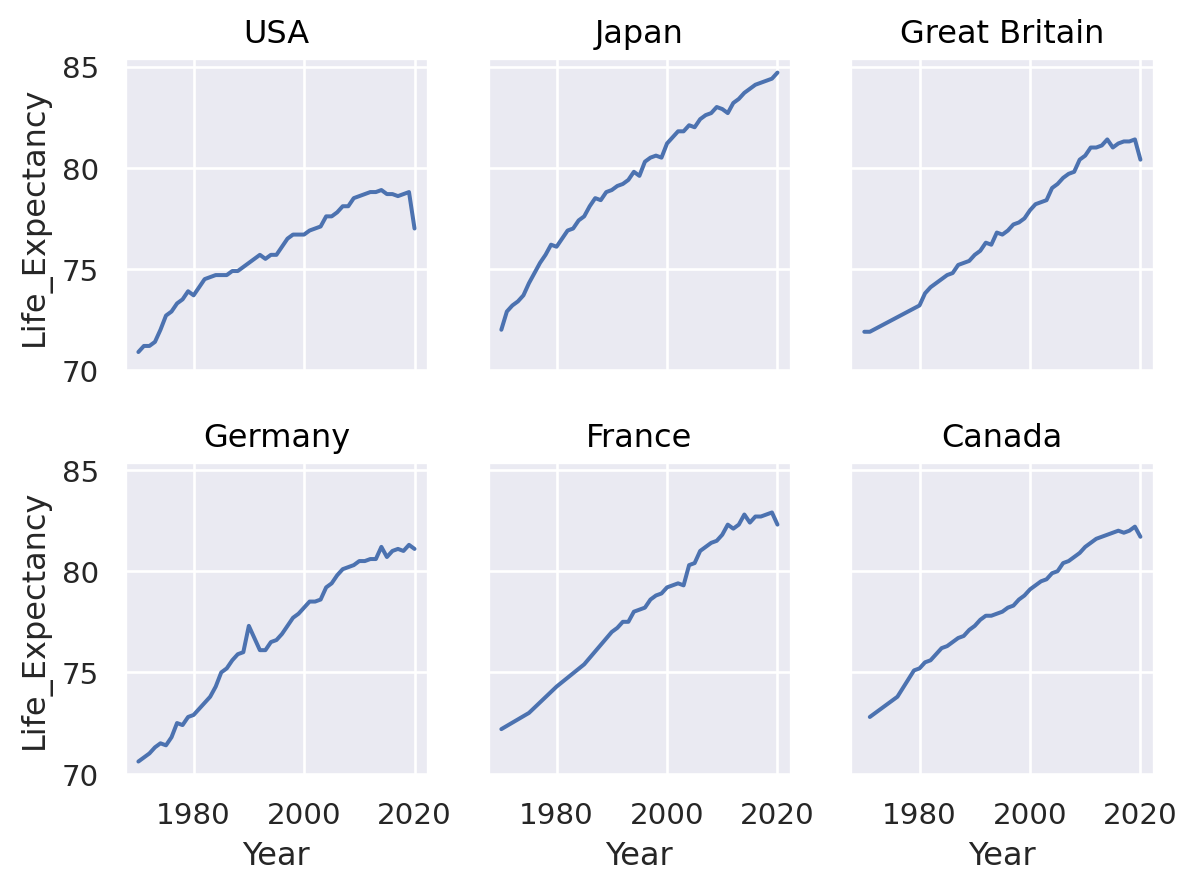

In [28]:
(
    so.Plot(data=healthexp, x="Year", y="Life_Expectancy")
    .facet(col="Country", wrap=3)
    .add(so.Line())
)

All layers will be faceted unless you explicitly exclude them, which can be useful for providing additional context on each subplot:

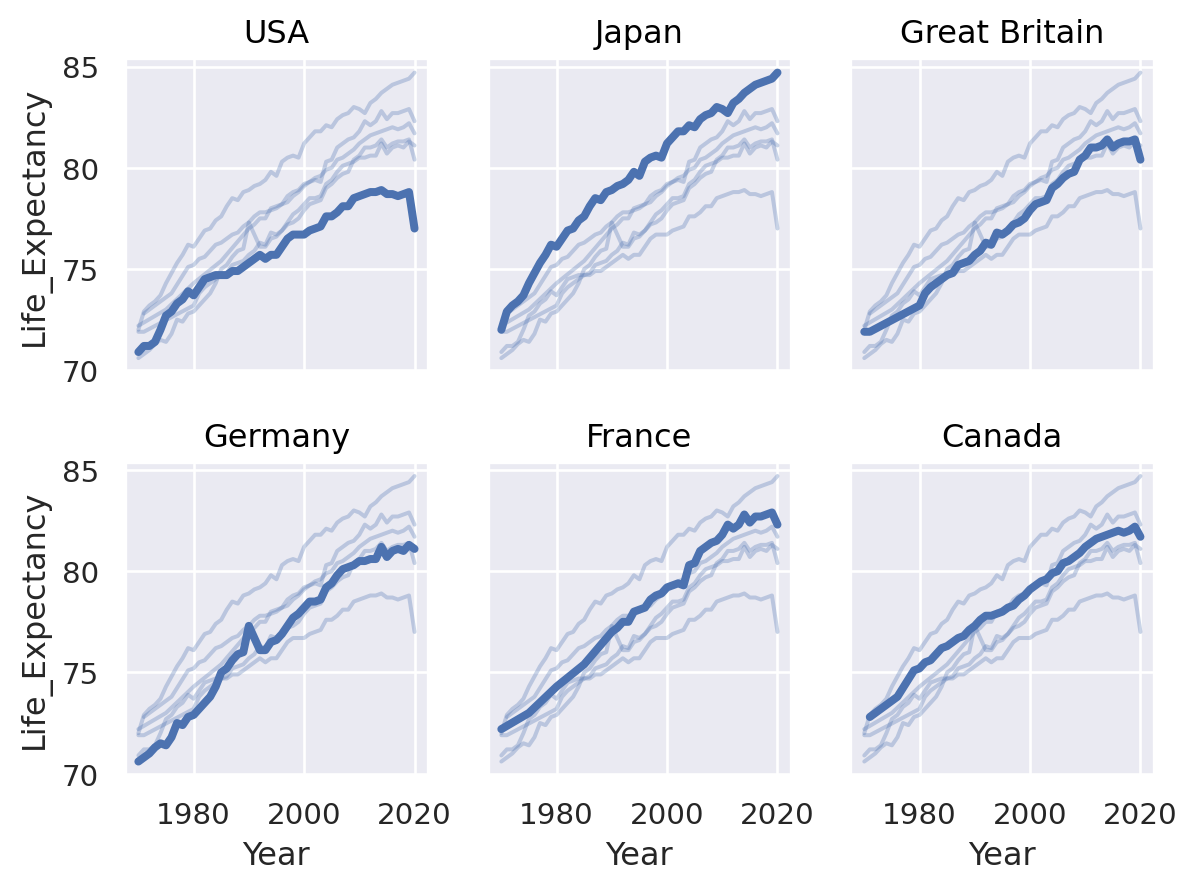

In [29]:
(
    so.Plot(data=healthexp, x="Year", y="Life_Expectancy")
    .facet("Country", wrap=3)
    .add(so.Line(alpha=.3), group="Country", col=None)
    .add(so.Line(linewidth=3))
)

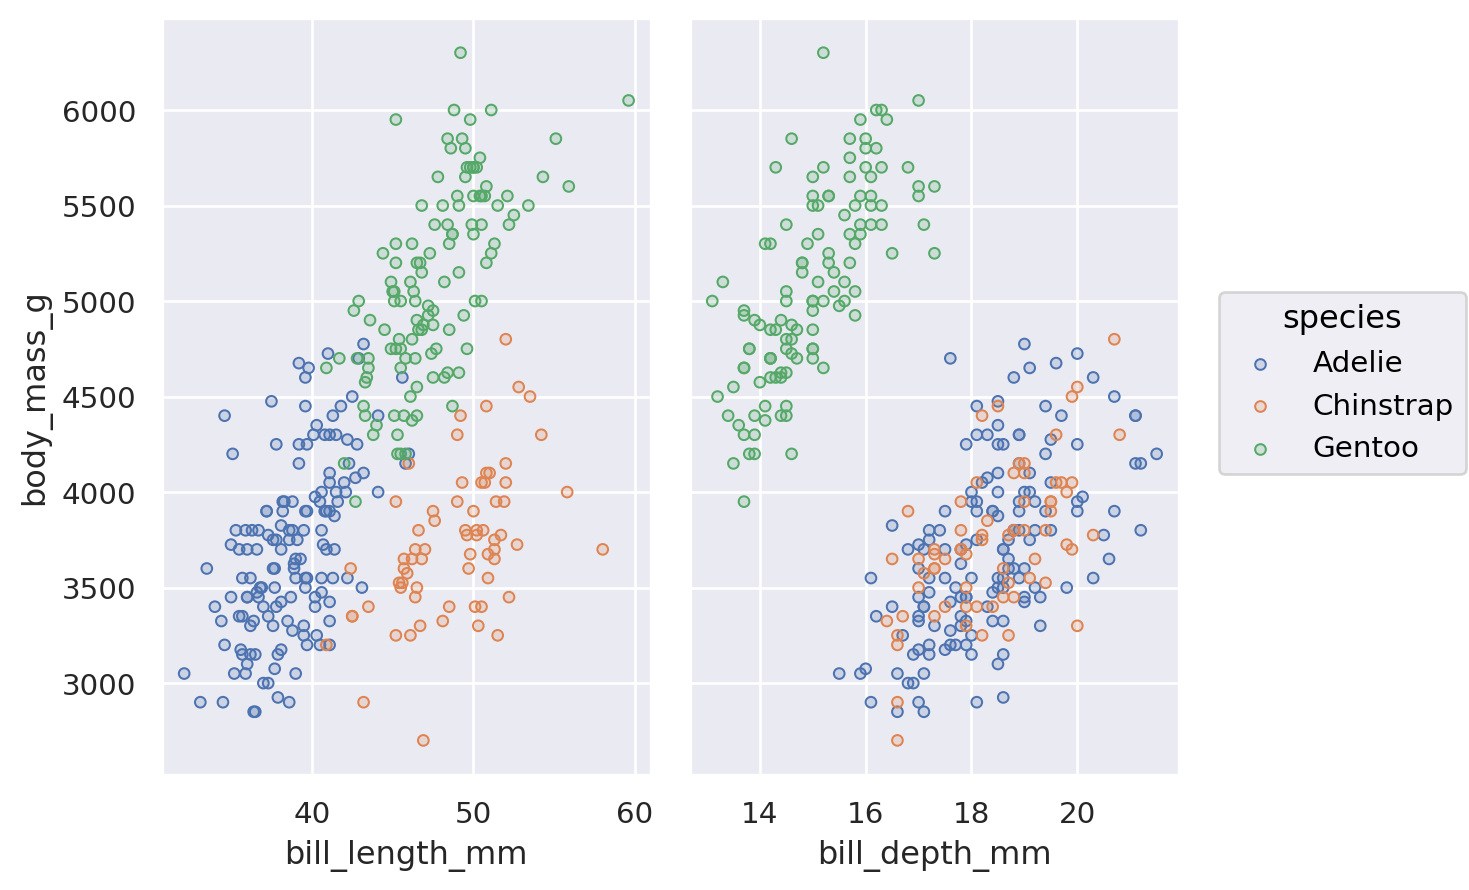

In [30]:
(
    so.Plot(data=penguins, y="body_mass_g", color="species")
    .pair(x=["bill_length_mm", "bill_depth_mm"])
    .add(so.Dots())
)

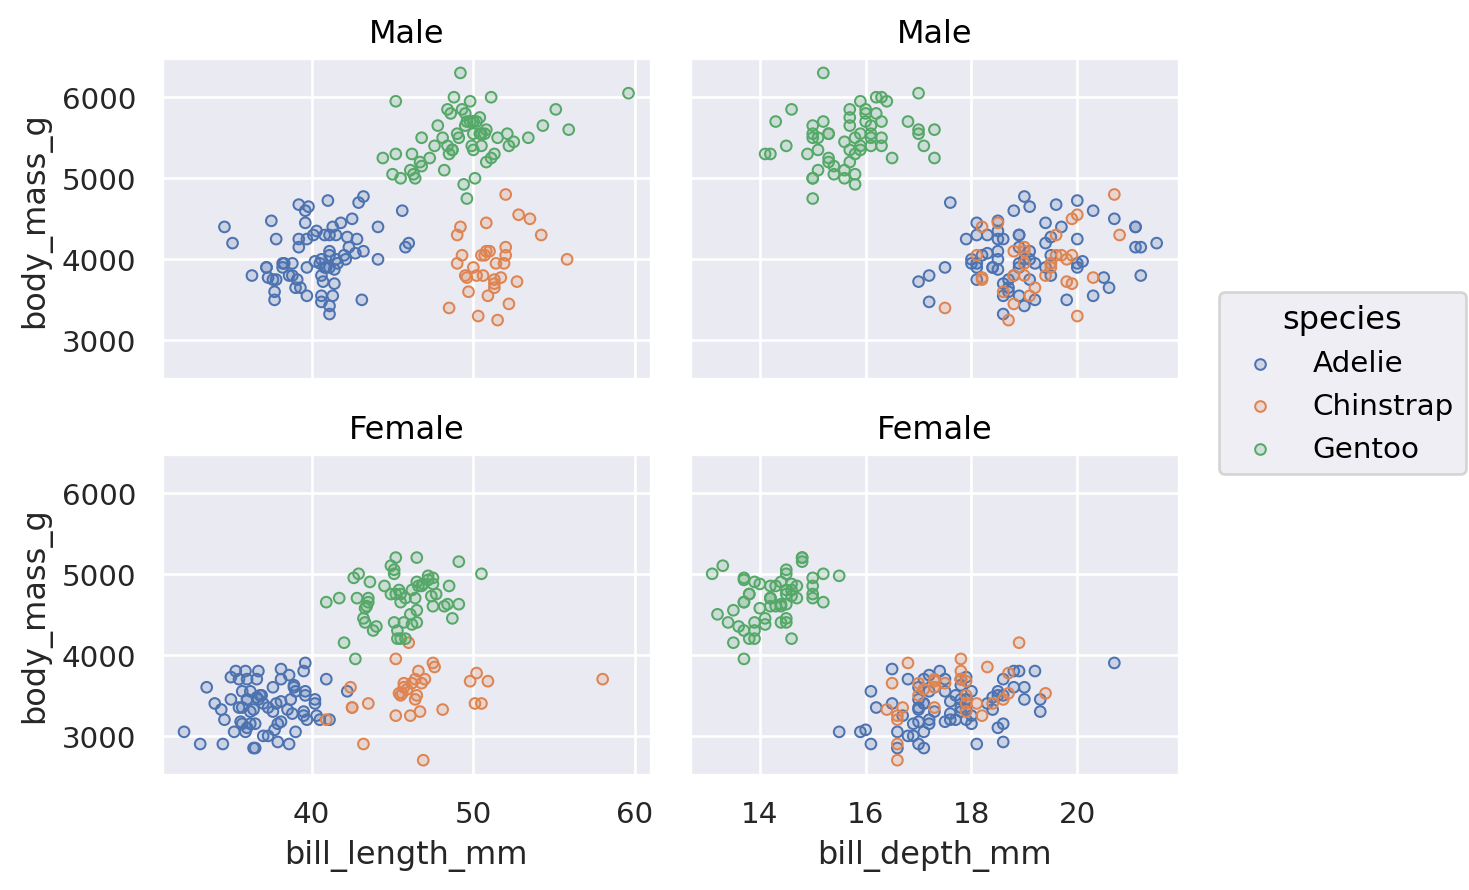

In [31]:
(
    so.Plot(data=penguins, y="body_mass_g", color="species")
    .pair(x=["bill_length_mm", "bill_depth_mm"])
    .facet(row="sex")
    .add(so.Dots())
)

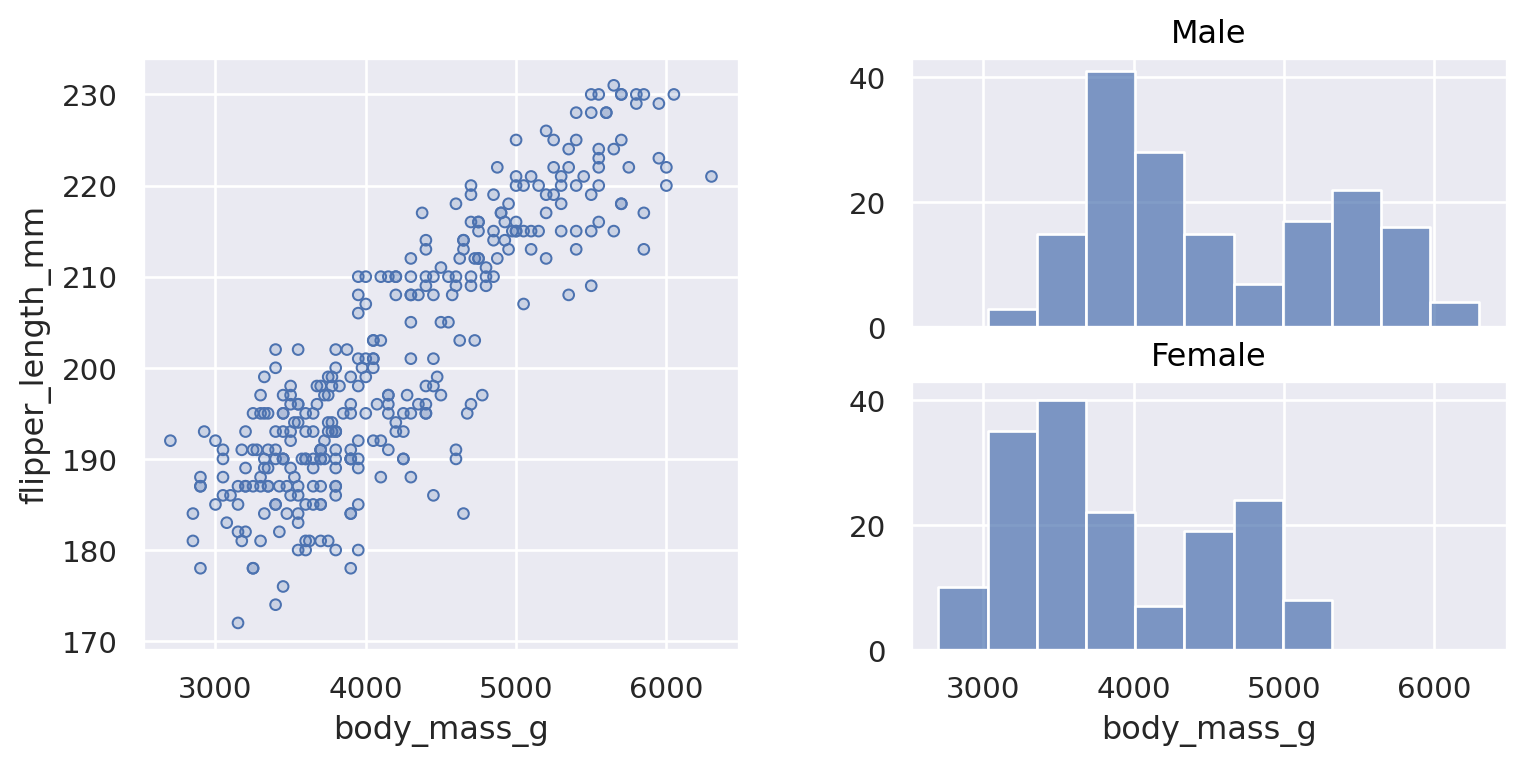

In [32]:
f = mpl.figure.Figure(figsize=(8, 4))
sf1, sf2 = f.subfigures(1, 2)
(
    so.Plot(data=penguins, x="body_mass_g", y="flipper_length_mm")
    .add(so.Dots())
    .on(sf1)
    .plot()
)
(
    so.Plot(data=penguins, x="body_mass_g")
    .facet(row="sex")
    .add(so.Bars(), so.Hist())
    .on(sf2)
    .plot()
)

In [33]:
p = so.Plot(data=healthexp, x="Year", y="Spending_USD", color="Country")

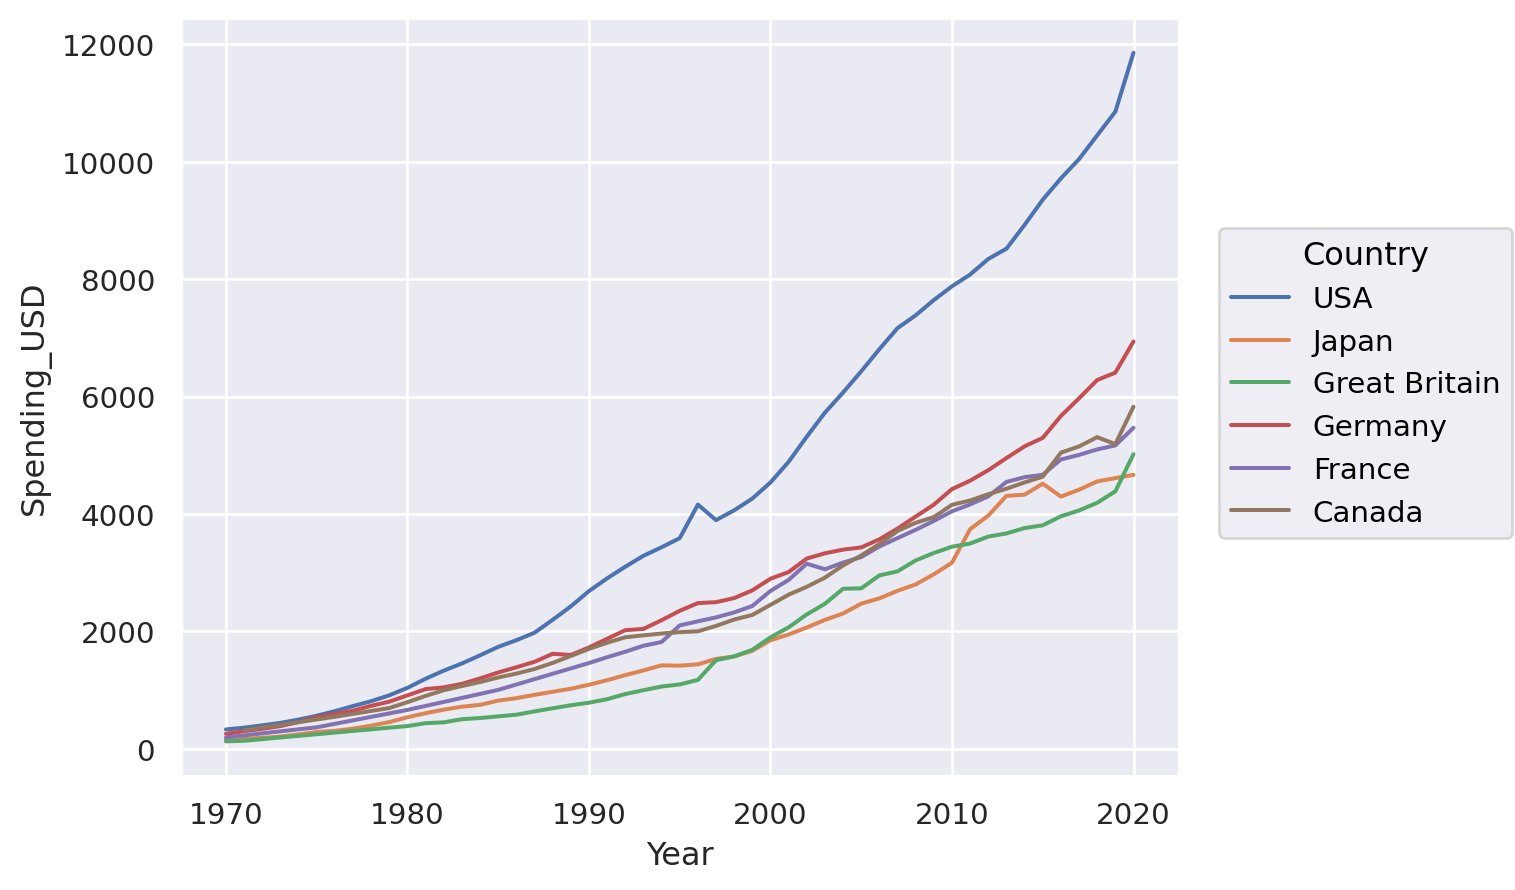

In [34]:
p.add(so.Line())

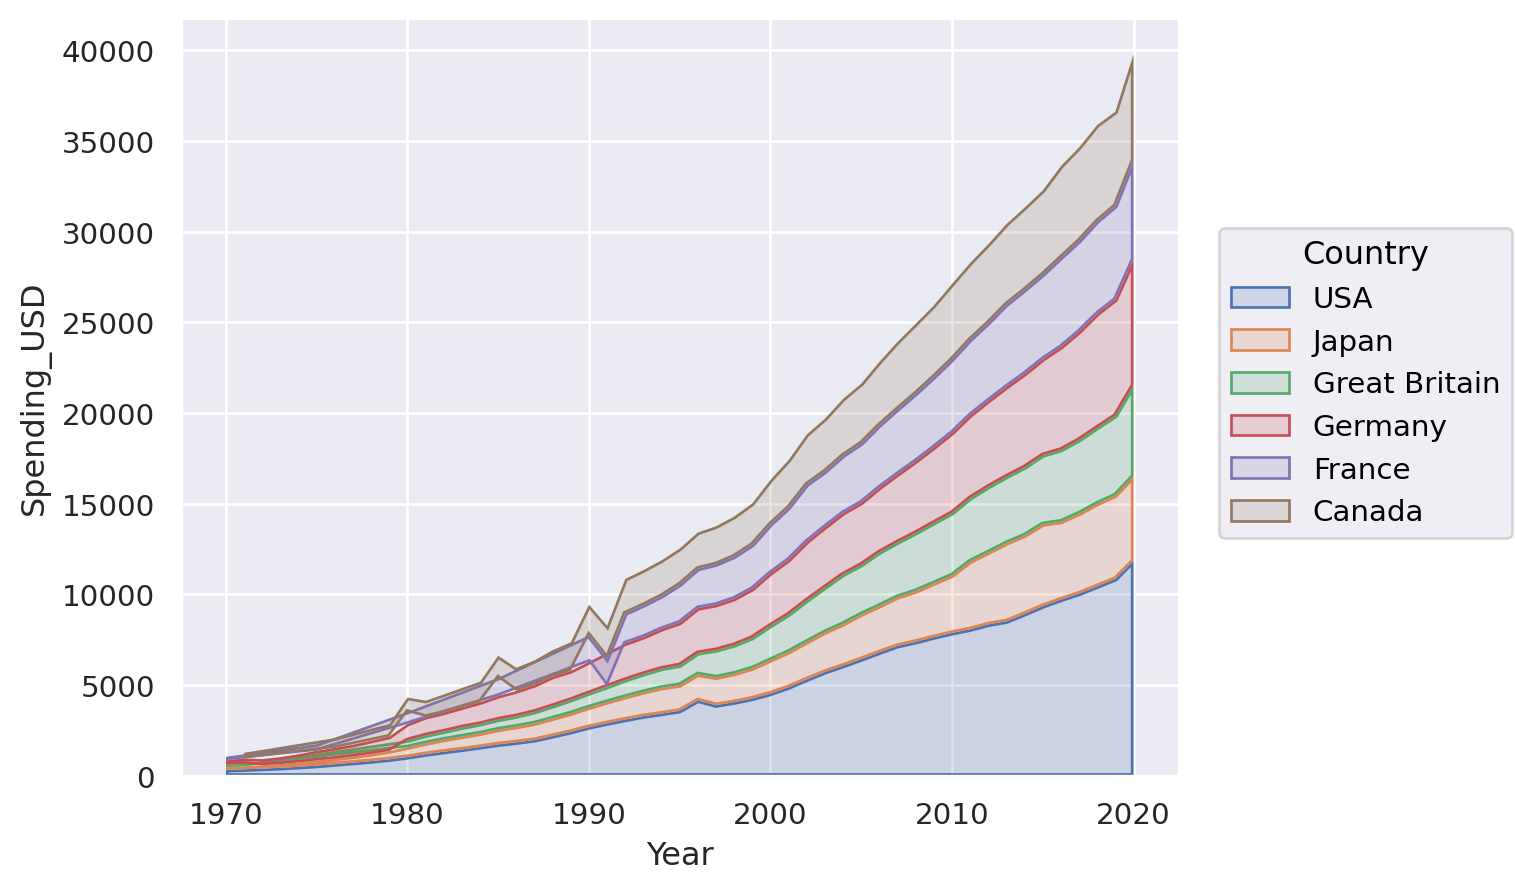

In [35]:
p.add(so.Area(), so.Stack())

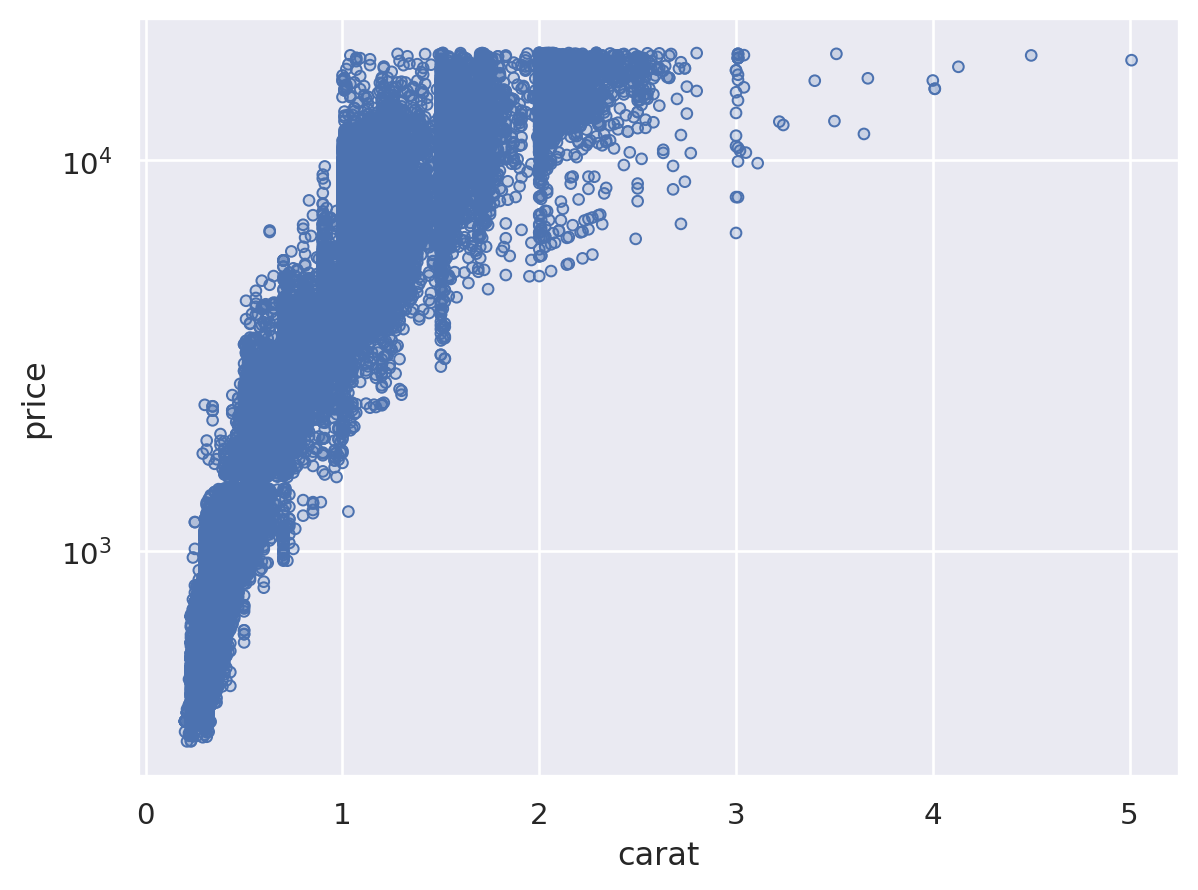

In [36]:
(
    so.Plot(data=diamonds, x="carat", y="price")
    .add(so.Dots())
    .scale(y="log")
)

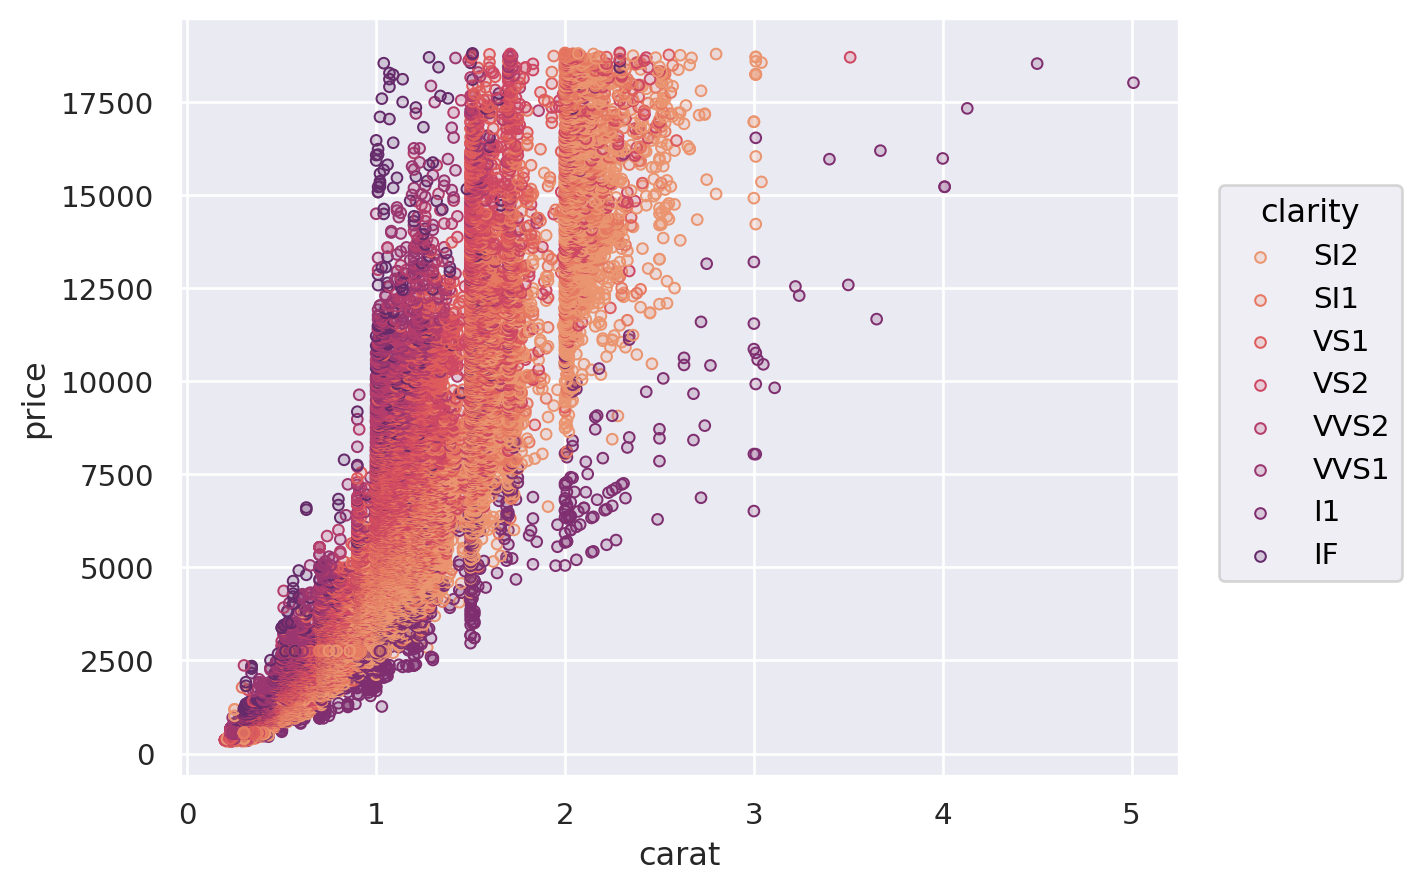

In [37]:
(
    so.Plot(data=diamonds, x="carat", y="price", color="clarity")
    .add(so.Dots())
    .scale(color="flare")
)

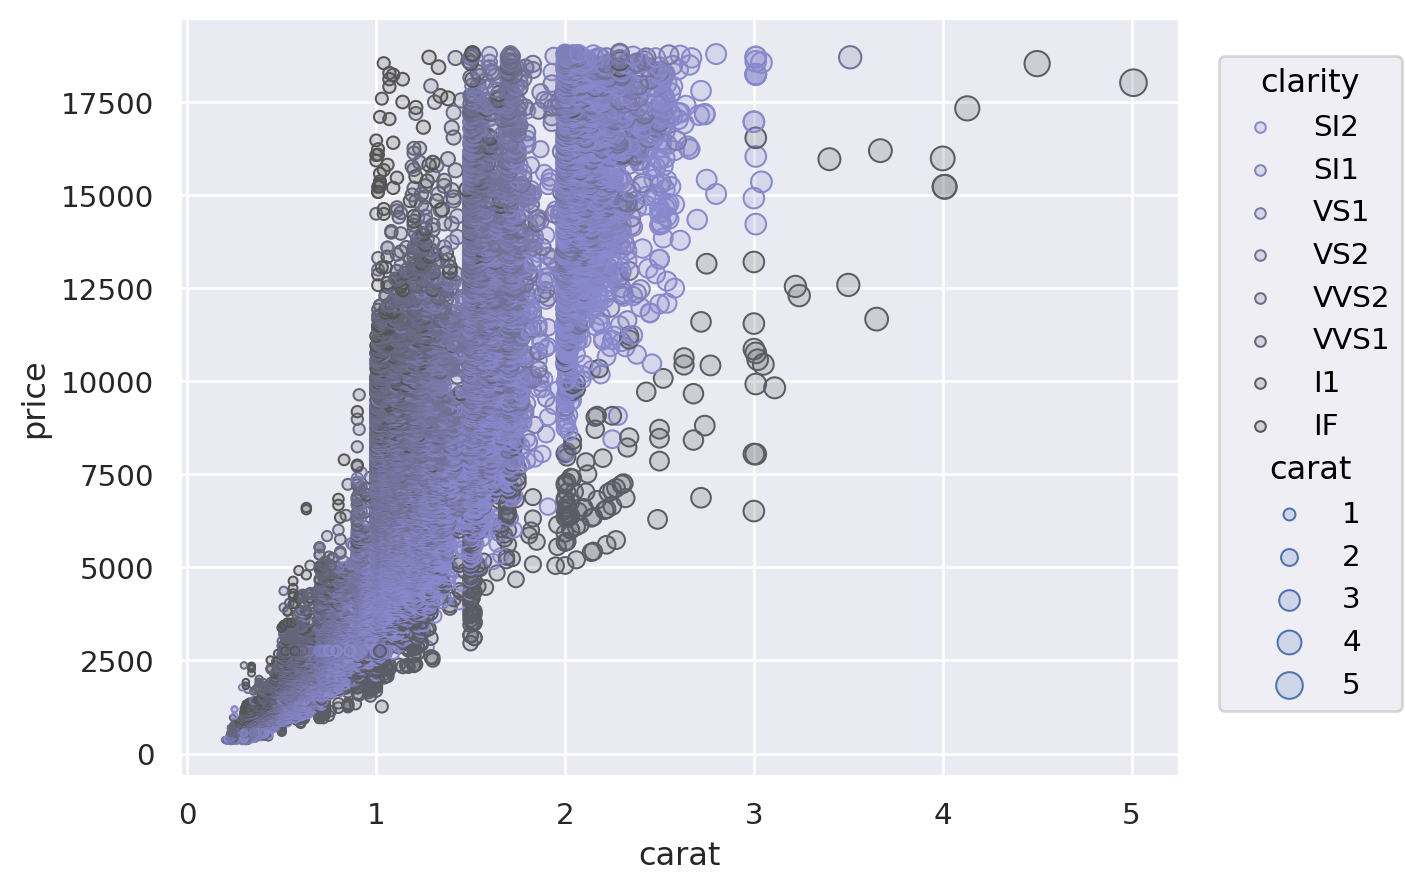

In [38]:
(
    so.Plot(data=diamonds, x="carat", y="price", color="clarity", pointsize="carat")
    .add(so.Dots())
    .scale(color=("#88c", "#555"), pointsize=(2, 10))
)

/home/marcogorelli/seaborn-dev/seaborn/_core/properties.py:370: RuntimeWarning: invalid value encountered in cast
  ixs = np.asarray(x, np.intp)


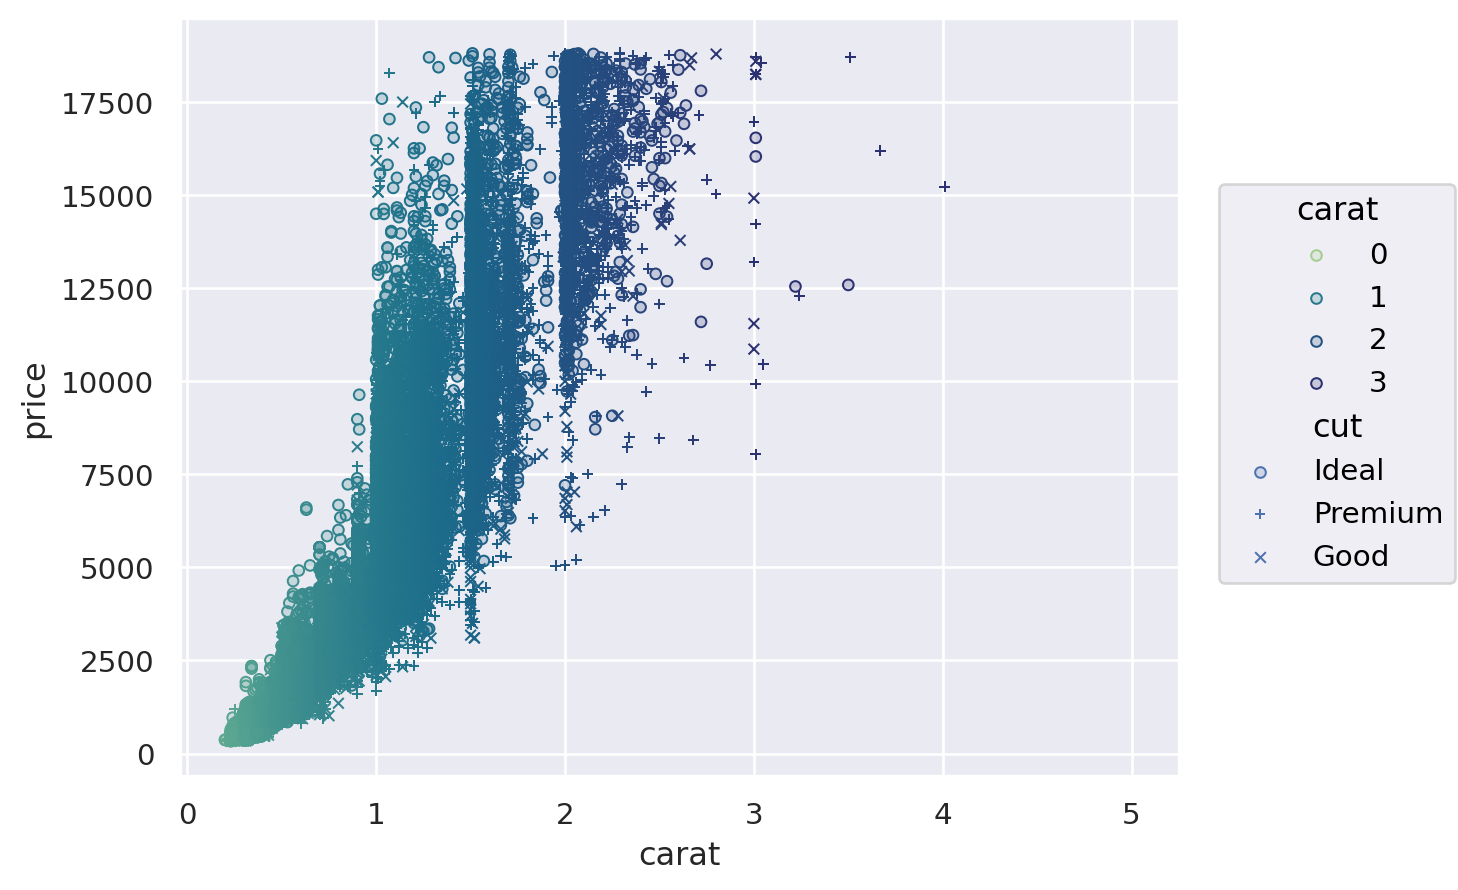

In [39]:
(
    so.Plot(data=diamonds, x="carat", y="price", color="carat", marker="cut")
    .add(so.Dots())
    .scale(
        color=so.Continuous("crest", norm=(0, 3), trans="sqrt"),
        marker=so.Nominal(["o", "+", "x"], order=["Ideal", "Premium", "Good"]),
    )
)

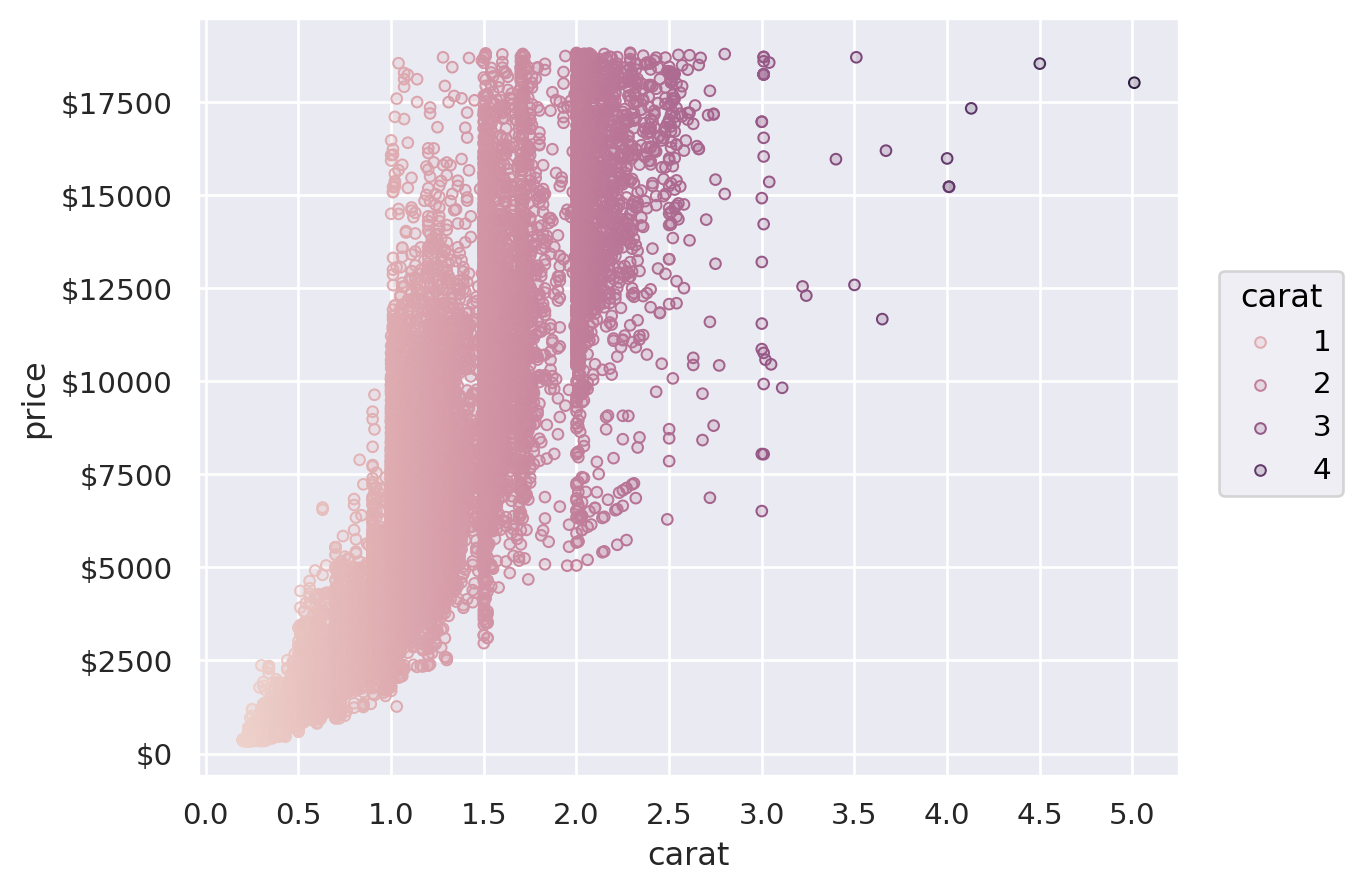

In [40]:
(
    so.Plot(data=diamonds, x="carat", y="price", color="carat")
    .add(so.Dots())
    .scale(
        x=so.Continuous().tick(every=0.5),
        y=so.Continuous().label(like="${x:.0f}"),
        color=so.Continuous().tick(at=[1, 2, 3, 4]),
    )
)

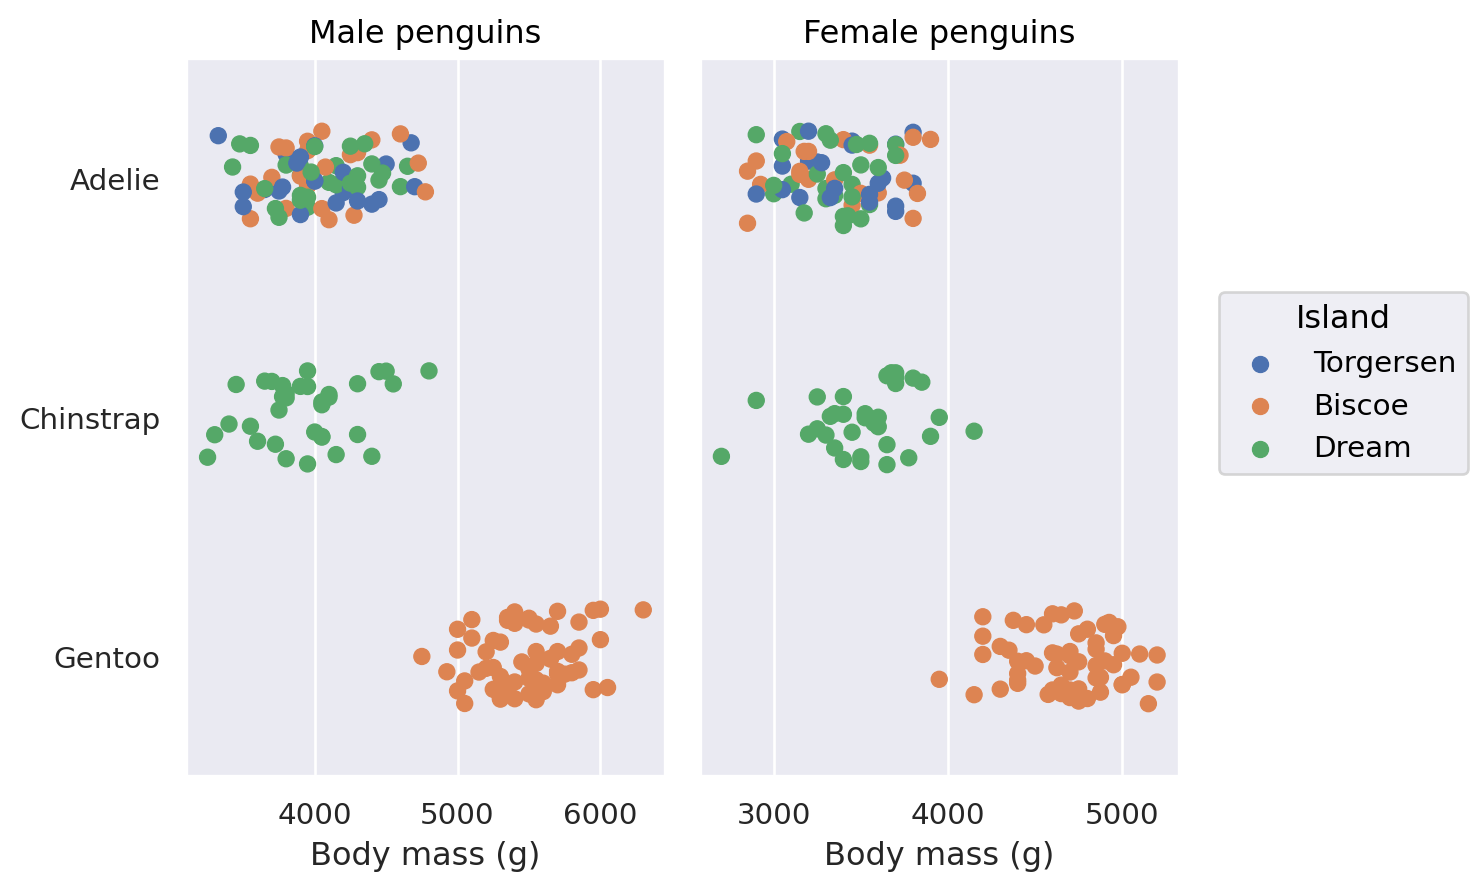

In [41]:
(
    so.Plot(data=penguins, x="body_mass_g", y="species", color="island")
    .facet(col="sex")
    .add(so.Dot(), so.Jitter(.5))
    .share(x=False)
    .limit(y=(2.5, -.5))
    .label(
        x="Body mass (g)", y="",
        color=str.capitalize,
        title="{} penguins".format,
    )
)

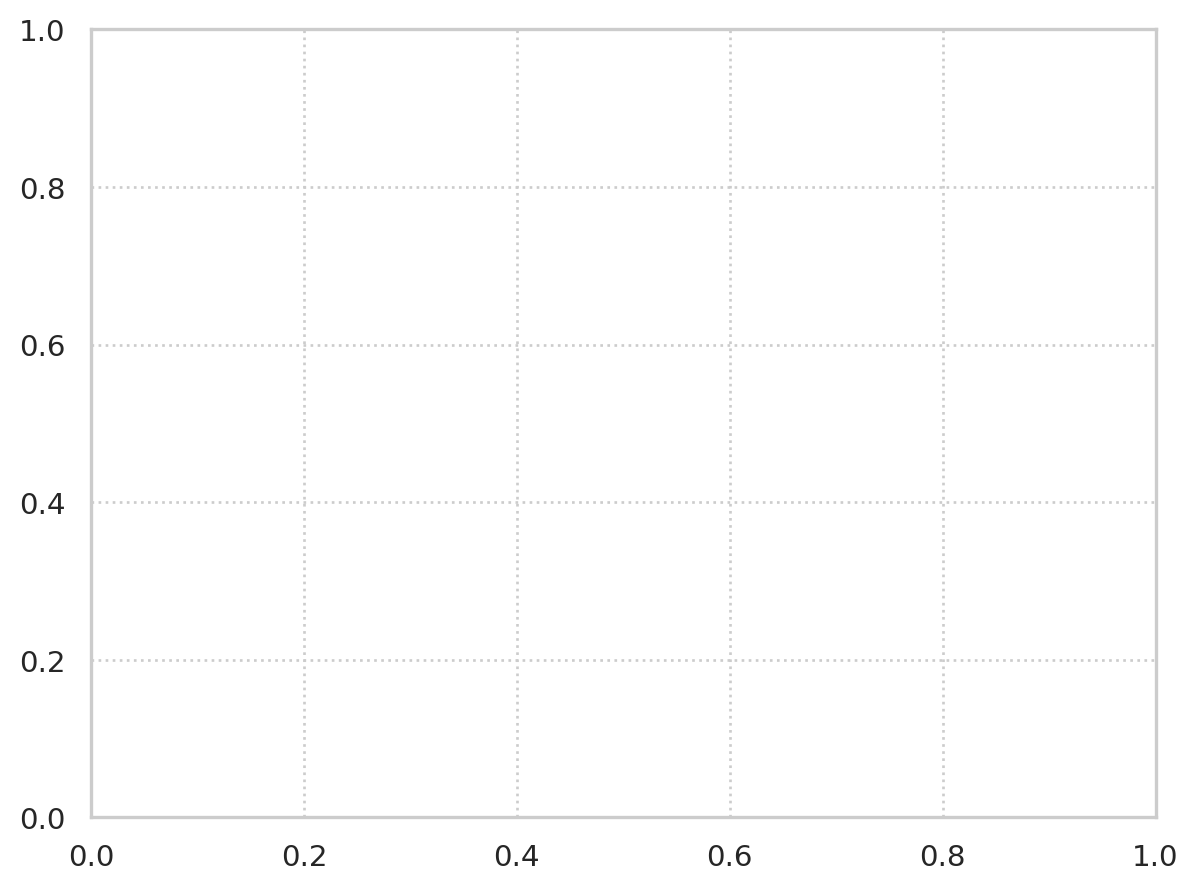

In [42]:
from seaborn import axes_style
theme_dict = {**axes_style("whitegrid"), "grid.linestyle": ":"}
so.Plot().theme(theme_dict)

In [43]:
so.Plot.config.theme.update(theme_dict)